In [5]:
!pip install tabulate


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
import joblib
from tabulate import tabulate

# Misuse label mappings
label_map = {
    0: "Cipher", 1: "Hash", 2: "Key", 3: "IV",
    4: "HNV", 5: "HNVOR", 6: "TLS", 7: "TM"
}

# Filepath for the dataset (with augmentation methods)
dataset_path = "code2vec_feature_matrix.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
X = df.drop(columns=["label"])
y = df["label"]

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train SVM classifier (with RBF kernel)
clf = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)

# Train the model on the augmented data
clf.fit(X_train_smote, y_train_smote)

# Save the trained model to a file
model_filename = 'svm_rbf_smote_model.pkl'
joblib.dump(clf, model_filename)

 

['svm_rbf_smote_model.pkl']

In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"])
y = df["label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid Search 
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Predict
y_pred = grid.predict(X_test_scaled)

# Metrics
print("✅ Best Parameters:", grid.best_params_)
print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(grid.best_estimator_, "svm_best_model.pkl")
joblib.dump(scaler, "scaler.pkl")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
🎯 Accuracy: 83.99 %
📉 Confusion Matrix:
 [[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   1   0   3  11 114]]
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       296
           1       0.88      0.91      0.89       306
           2       0.82      0.90      0.86       306
           3       0.96      0.59      0.73        39
           4       0.86      0.73      0.79       107
           5       0.85      0.65      0.74       110
           6       0.81      0.83      0.82       262
           7       0.87      0.80      0.84       142

    accuracy                           0

['scaler.pkl']

In [19]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Load dataset
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"])
y = df["label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Grid Search with extended params
param_grid = {
    'C': [0.1, 1, 10, 100, 500],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

# Predict
y_pred = grid.predict(X_test_scaled)

# Metrics
print("✅ Best Parameters:", grid.best_params_)
print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save
joblib.dump(grid.best_estimator_, "svm_aug_better_model.pkl")
joblib.dump(scaler, "scaler_aug_better.pkl")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
✅ Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
🎯 Accuracy: 82.08 %
📉 Confusion Matrix:
 [[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   1   0   3   8 108]]
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       296
           1       0.81      0.89      0.85       306
           2       0.84      0.87      0.85       306
           3       0.74      0.59      0.66        39
           4       0.90      0.78      0.83       107
           5       0.79      0.67      0.73       110
           6       0.85      0.79      0.82       262
           7       0.84      0.76      0.80       142

    accuracy   

['scaler_aug_better.pkl']

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Load Dataset ===
df = pd.read_csv("code2vec_test.csv") 
X = df.drop(columns=["label"])
y = df["label"]

# === Label Mapping (adjust as per your label encoding) ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Evaluation Function ===
def evaluate_model(model_path, scaler_path, model_name):
    print(f"\n🧪 Evaluating {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Scale test data
    X_test_scaled = scaler.transform(X_test)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # === Metrics ===
    acc = accuracy_score(y_test, y_pred)
    print(f"🎯 Accuracy: {round(acc * 100, 2)}%")

    print("\n📋 Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=[label_mapping[i] for i in sorted(label_mapping.keys())]
    ))

    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Evaluate Models ===
evaluate_model("svm_best_model.pkl", "scaler.pkl", "WITHOUT Augmentation")
evaluate_model("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "WITH Augmentation")



🧪 Evaluating WITHOUT Augmentation
🎯 Accuracy: 80.57%

📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.75      0.86      0.80        59
        hash       0.79      0.87      0.83        61
         hnv       0.85      0.85      0.85        61
       hnvor       1.00      0.38      0.55         8
          iv       0.76      0.62      0.68        21
         key       0.86      0.55      0.67        22
          tm       0.79      0.83      0.81        53
         tls       0.89      0.86      0.88        29

    accuracy                           0.81       314
   macro avg       0.84      0.73      0.76       314
weighted avg       0.81      0.81      0.80       314

📉 Confusion Matrix:
[[51  2  0  0  2  1  3  0]
 [ 2 53  1  0  2  0  1  2]
 [ 2  4 52  0  0  0  3  0]
 [ 2  1  1  3  0  0  1  0]
 [ 1  4  1  0 13  1  1  0]
 [ 4  2  2  0  0 12  2  0]
 [ 4  1  3  0  0  0 44  1]
 [ 2  0  1  0  0  0  1 25]]

🧪 Evaluating WITH Augmentation


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector (replace with actual vector) ===
input_feature = np.array([-0.0008724575, 0.001863176, 0.0049711573, 0.0026179429, -0.0028028542, -0.003743778, 0.007480124, 0.004783073, 0.0012874759, -0.0015595687, 0.006229173, 0.004875329, 0.004308616, -0.0014140167, 
                          -0.003892947, -0.0003943007, -0.0006337726, 0.0033941753, -0.00018107727, 0.0010466301, 0.0023244764, 0.0054765344, 0.007633877, -0.0058392882, 0.0006333168, 0.0029329231, 0.0004395742, 0.006049422, 0.0040124594, -0.00023707112, 
                          -0.00057387294, 0.0012457195, -0.0017327964, -0.0040048105, -0.005648933, 0.0018013318, 0.0036672116, -0.00025849682, 0.008168033, -0.0012391475, 0.004515979, 0.0014774549, -0.0013882185, -0.0041119354, -3.768269E-05, 0.0040321816, -6.359343E-05, 
                          -0.006450773, -0.0035936597, 0.0006795458, 0.0049464423, 0.0053374227, -0.0016413225, 0.0035783546, 0.0040635266, -0.0033126227, 0.0067519215, -0.0050295857, 0.0026799464, -0.0062345993, 0.0033508358, -0.0017281777, -0.002926014, 0.0026736483

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split full dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Evaluation & Prediction Function ===
def evaluate_and_predict(model_path, scaler_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")
    
    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # ==== Single Prediction ====
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {label_mapping.get(pred_single)} (label {pred_single})")

    # ==== Full Test Evaluation ====
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping.keys())]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", input_feature, "WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", input_feature, "WITHOUT Augmentation")



🔎 Model: WITH Augmentation
🔍 Single Input Prediction: hnv (label 2)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector (replace with actual vector) ===
input_feature = np.array([0.0009258053, -0.0010001528, 0.002438116, 6.6151784E-05, 0.00016310472, -0.00089170516, -0.0007350334, 0.0006725968,
-0.0006222957, -6.021381E-05, 0.0014948753, -0.0015822655, -0.00086601207, 4.8531187E-05, -0.00081458903, 0.001059729,
3.4763663E-05, -0.0001768458, -4.435824E-05, 0.0009996848, 0.0006893093, 0.0003959123, 0.0019316192, 0.0002945682,
-0.00076222466, 0.002877803, -0.0015886227, -0.0007034026, -0.0015576058, -0.0011040543, -6.0169496E-05, 0.00034599315,
-0.0009740902, -0.0008662917, 0.00015724312, -0.00028002154, 0.0007909829, 0.0004128737, 0.0013095114, -0.0009049925,
-0.00016917435, 0.0009150088, -6.262302E-05, -0.0017955265, 0.0005617868, -0.0017073188, -0.000204737, 7.308495E-05,
0.0005412304, 0.000986249, 0.00021594336, -0.00031045268, 0.00074849743, 0.00086241524, 0.00088845624, 0.0018485929,
0.0021400824, -0.00030509062, -0.0009399824, 0.0009216609, -0.0002177232, -0.00068215124, -0.00050478627, 0.00034695247

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split full dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Evaluation & Prediction Function ===
def evaluate_and_predict(model_path, scaler_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")
    
    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # ==== Single Prediction ====
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {label_mapping.get(pred_single)} (label {pred_single})")

    # ==== Full Test Evaluation ====
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping.keys())]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", input_feature, "WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", input_feature, "WITHOUT Augmentation")



🔎 Model: WITH Augmentation
🔍 Single Input Prediction: hash (label 1)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector (replace with actual vector) ===
input_feature = np.array([-0.0028004753, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007
 

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split full dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Evaluation & Prediction Function ===
def evaluate_and_predict(model_path, scaler_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")
    
    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # ==== Single Prediction ====
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {label_mapping.get(pred_single)} (label {pred_single})")

    # ==== Full Test Evaluation ====
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping.keys())]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", input_feature, "WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", input_feature, "WITHOUT Augmentation")



🔎 Model: WITH Augmentation
🔍 Single Input Prediction: key (label 5)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [42]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load CSV
df = pd.read_csv('code2vec_feature_matrix.csv', header=None)

# 2. Remove invalid label rows (e.g. 'label' string)
df = df[df.iloc[:, -1] != 'label']

# 3. Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 4. Encode string labels (for consistency in later predictions)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, "label_encoder_no_aug.pkl")  # Save label encoder

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 6. Feature scaling (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "scaler_no_aug.pkl")  # Save the scaler

# 7. Define MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1,
    random_state=42,
    verbose=True
)

# 8. Train the model
mlp.fit(X_train, y_train)

# 9. Save the model
joblib.dump(mlp, "mlp_model_no_aug.pkl")
print("✅ Model and scaler saved!")

# 10. Evaluate the model
y_pred = mlp.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Iteration 1, loss = 1.36315357
Validation score: 0.654459
Iteration 2, loss = 0.89120268
Validation score: 0.707006
Iteration 3, loss = 0.76170528
Validation score: 0.754777
Iteration 4, loss = 0.67753921
Validation score: 0.778662
Iteration 5, loss = 0.62613402
Validation score: 0.778662
Iteration 6, loss = 0.58692074
Validation score: 0.791401
Iteration 7, loss = 0.56083536
Validation score: 0.805732
Iteration 8, loss = 0.56601344
Validation score: 0.800955
Iteration 9, loss = 0.50834024
Validation score: 0.826433
Iteration 10, loss = 0.47758281
Validation score: 0.818471
Iteration 11, loss = 0.46350987
Validation score: 0.826433
Iteration 12, loss = 0.43914921
Validation score: 0.831210
Iteration 13, loss = 0.43796174
Validation score: 0.802548
Iteration 14, loss = 0.41939134
Validation score: 0.821656
Iteration 15, loss = 0.40969092
Validation score: 0.845541
Iteration 16, loss = 0.38686609
Validation score: 0.839172
Iteration 17, loss = 0.36454212
Validation score: 0.831210
Iterat

In [43]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Load CSV
df = pd.read_csv('code2vec_feature_matrix.csv', header=None)

# 2. Remove invalid label row (with literal string 'label')
df = df[df.iloc[:, -1] != 'label']

# 3. Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 4. Encode labels (so SMOTE works and it's consistent)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, "label_encoder_aug.pkl")  # Save encoder

# 5. Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 6. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "scaler_aug.pkl")  # Save the scaler

# 7. Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_aug, y_train_aug = smote.fit_resample(X_train, y_train)

# 8. Define MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1,
    random_state=42,
    verbose=True
)

# 9. Train the model
mlp.fit(X_train_aug, y_train_aug)

# 10. Save model
joblib.dump(mlp, "mlp_model_aug.pkl")
print("✅ SMOTE-augmented model and scaler saved!")

# 11. Evaluate the model
y_pred = mlp.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Iteration 1, loss = 1.25324528
Validation score: 0.685714
Iteration 2, loss = 0.78948519
Validation score: 0.710204
Iteration 3, loss = 0.65606862
Validation score: 0.780612
Iteration 4, loss = 0.56839821
Validation score: 0.780612
Iteration 5, loss = 0.50759067
Validation score: 0.818367
Iteration 6, loss = 0.46517990
Validation score: 0.825510
Iteration 7, loss = 0.43604650
Validation score: 0.835714
Iteration 8, loss = 0.39509006
Validation score: 0.843878
Iteration 9, loss = 0.37196138
Validation score: 0.848980
Iteration 10, loss = 0.35283980
Validation score: 0.839796
Iteration 11, loss = 0.34027737
Validation score: 0.852041
Iteration 12, loss = 0.31021727
Validation score: 0.860204
Iteration 13, loss = 0.29655192
Validation score: 0.859184
Iteration 14, loss = 0.29119521
Validation score: 0.862245
Iteration 15, loss = 0.26516688
Validation score: 0.868367
Iteration 16, loss = 0.25297317
Validation score: 0.881633
Iteration 17, loss = 0.23592923
Validation score: 0.887755
Iterat

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector ===
input_feature = np.array([0.0009258053, -0.0010001528, 0.002438116, 6.6151784E-05, 0.00016310472, -0.00089170516, -0.0007350334, 0.0006725968,
-0.0006222957, -6.021381E-05, 0.0014948753, -0.0015822655, -0.00086601207, 4.8531187E-05, -0.00081458903, 0.001059729,
3.4763663E-05, -0.0001768458, -4.435824E-05, 0.0009996848, 0.0006893093, 0.0003959123, 0.0019316192, 0.0002945682,
-0.00076222466, 0.002877803, -0.0015886227, -0.0007034026, -0.0015576058, -0.0011040543, -6.0169496E-05, 0.00034599315,
-0.0009740902, -0.0008662917, 0.00015724312, -0.00028002154, 0.0007909829, 0.0004128737, 0.0013095114, -0.0009049925,
-0.00016917435, 0.0009150088, -6.262302E-05, -0.0017955265, 0.0005617868, -0.0017073188, -0.000204737, 7.308495E-05,
0.0005412304, 0.000986249, 0.00021594336, -0.00031045268, 0.00074849743, 0.00086241524, 0.00088845624, 0.0018485929,
0.0021400824, -0.00030509062, -0.0009399824, 0.0009216609, -0.0002177232, -0.00068215124, -0.00050478627, 0.00034695247
]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess the dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Load the label encoder (used during training)
label_encoder = joblib.load("label_encoder_aug.pkl")  # Change to "label_encoder_no_aug.pkl" for non-aug

# Encode labels
y_encoded = label_encoder.transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # Single prediction
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {encoder.inverse_transform([pred_single])[0]} (label {pred_single})")

    # Evaluate on test set
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", input_feature, "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", input_feature, "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🔍 Single Input Prediction: 4 (label 4)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5   1]
 [ 13   2   4   0  78   6   4   0]
 [ 18   4  1

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector ===
input_feature = np.array([-0.0028004753, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007, 0.0011439007
 

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess the dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Load the label encoder (used during training)
label_encoder = joblib.load("label_encoder_aug.pkl")  # Change to "label_encoder_no_aug.pkl" for non-aug

# Encode labels
y_encoded = label_encoder.transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # Single prediction
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {encoder.inverse_transform([pred_single])[0]} (label {pred_single})")

    # Evaluate on test set
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", input_feature, "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", input_feature, "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🔍 Single Input Prediction: 5 (label 5)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5   1]
 [ 13   2   4   0  78   6   4   0]
 [ 18   4  1

In [47]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector ===
input_feature = np.array([0.00064698135, -0.00030720956, 0.002766056, 0.0011397165, -0.0005514745, -0.00103987, -0.0004339021, -0.0008187506, -0.0014995051, -0.0008578457, 0.0014524786, -0.00047994097, -0.0010592336, -0.0006134267, -0.00070509256, 0.00036889012, 0.00012930774, -0.00014273166, 0.00027171796, 0.0019933025, 0.00034675925, -0.00034101855, 0.0015145557, -0.0012254291, -0.00020732207, 0.0020227921, -0.0020969748, -0.0009644545, -0.0010915512, -0.0015221874, -0.00019645256, 0.00033188803, -0.0024143348, -0.0015839958, 0.0018026636, -0.00023066315, 0.00040068358, 0.00047310212, 0.00080651516, 5.7331592E-05, -0.00065847987, 0.0005814616, -0.000983423, -0.0012137374, 0.0019416366, -0.0008494907, -0.0008792853, 0.00012290545, 0.00087792997, 0.0009629919, 0.00015941256, 4.9263872E-05, 0.0006973697, 0.0011568024, 0.0015457117, -9.598432E-07, 0.000113924645, 0.00036932164, -0.00021675548, 0.00071310933, -0.00081988116, -0.0018691099, -0.00044605386, 0.00065755425

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess the dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Load the label encoder (used during training)
label_encoder = joblib.load("label_encoder_aug.pkl")  # Change to "label_encoder_no_aug.pkl" for non-aug

# Encode labels
y_encoded = label_encoder.transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # Single prediction
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {encoder.inverse_transform([pred_single])[0]} (label {pred_single})")

    # Evaluate on test set
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", input_feature, "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", input_feature, "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🔍 Single Input Prediction: 2 (label 2)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5   1]
 [ 13   2   4   0  78   6   4   0]
 [ 18   4  1

In [49]:
  import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Your input feature vector ===
input_feature = np.array([0.00044521168, -0.0009784166, 0.0021822334, 0.00047488508, 0.00050814037, -0.0014313039, 0.0005972105, -0.0003902038, -0.00015388636, -0.0003786755, -0.0004248417, -0.000978935, -0.00067087024, 0.00027690612, -3.4417928E-05, 0.00044217164, -0.00093354535, -5.5837318E-05, -0.0016544923, 0.00047452317, 0.0010844758, 0.0015887534, 0.001510265, -0.00058891164, -0.0001704123, 0.0013689452, -0.0015041127, 6.6168504E-05, -2.8996844E-06, -0.00023012159, -0.00051086355, 0.00020954406, -0.00092233304, -0.0012024081, 0.000695291, -0.00032975597, -0.00011695743, 0.0012691083, -0.00037990097, -0.0005479481, -0.00087108085, 0.00078122044, -0.0002826723, -0.0011912154, 0.0001949283, -0.001116575, 0.00010091877, -1.0797197E-05, 6.295941E-05, 0.0007918486, 0.00014040056, 0.0004951031, 0.0019188568, 0.0016141561, 0.0013971699, 0.0017597241, -0.00018375531, 8.865966E-05, -0.0018655283, 0.000647236, -0.0011325352, -0.0016682685, -0.0011140457, -0.00033898905

]).reshape(1, -1)

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess the dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Load the label encoder (used during training)
label_encoder = joblib.load("label_encoder_aug.pkl")  # Change to "label_encoder_no_aug.pkl" for non-aug

# Encode labels
y_encoded = label_encoder.transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, input_vector, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # Single prediction
    input_scaled = scaler.transform(input_vector)
    pred_single = model.predict(input_scaled)[0]
    print(f"🔍 Single Input Prediction: {encoder.inverse_transform([pred_single])[0]} (label {pred_single})")

    # Evaluate on test set
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", input_feature, "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", input_feature, "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🔍 Single Input Prediction: 7 (label 7)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5   1]
 [ 13   2   4   0  78   6   4   0]
 [ 18   4  1

In [51]:
!pip install shap


In [68]:
# Load the data
data = pd.read_csv("code2vec_feature_matrix.csv")

# Features = all columns except the last
X = data.iloc[:, :-1].values

# Labels = last column
y = data.iloc[:, -1].values

# Check feature shape
print("✔️ Feature matrix shape:", X.shape)
print("✔️ Label vector shape:", y.shape)


✔️ Feature matrix shape: (7839, 64)
✔️ Label vector shape: (7839,)


In [69]:
print("shap_values length:", len(shap_values))  # Should be 8
print("Predicted class:", predicted_class)       # Should be between 0 and 7


shap_values length: 1
Predicted class: 2


In [76]:
import shap
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("code2vec_feature_matrix.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns are named as strings: '0', '1', ..., '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP explainer (Kernel for any model) ===
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)  # background dataset
)

shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))
print("✔️ SHAP values length:", len(shap_values))

# === SHAP plot ===
shap.initjs()
if isinstance(shap_values, list) and len(shap_values) > predicted_class:
    shap.force_plot(
        explainer.expected_value[predicted_class],
        shap_values[predicted_class][0],
        input_df.iloc[0],
        feature_names=feature_names
    )
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")
    shap.force_plot(
        explainer.expected_value[predicted_class],
        shap_values[0, :, predicted_class],
        input_df.iloc[0],
        feature_names=feature_names
    )
else:
    print("⚠️ Unexpected SHAP format. Cannot plot.")


✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (7839, 64)
✅ Label vector shape: (7839,)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 0
✔️ SHAP values type: <class 'numpy.ndarray'>
✔️ SHAP values length: 1


✔️ SHAP value shape: (1, 64, 8)


In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.8004
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       318
           1       0.83      0.85      0.84       303
           2       0.82      0.83      0.82       317
           3       0.74      0.59      0.65        29
           4       0.77      0.81      0.79       109
           5       0.78      0.62      0.69       118
           6       0.74      0.82      0.78       239
           7       0.78      0.78      0.78       135

    accuracy                           0.80      1568
   macro avg       0.79      0.76      0.77      1568
weighted avg       0.80      0.80      0.80      1568

Confusion Matrix:
[[254   9  10   0  13  10  16   6]
 [  7 258  19   3   3   2   7   4]
 [  7  17 263   1   4   3  19   3]
 [  2   2   2  17   1   0   4   1]
 [  8   3   4   0  88   2   3   1]
 [ 11   7   8   2   5  73   9   3]
 [  7  10  10   0   0   3 197  12]
 [  5   6   5   0   1   0  13 105]]


✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (7839, 64)
✅ Label vector shape: (7839,)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


🔍 Computing SHAP values. This may take a few seconds...


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 0
✔️ SHAP values type: <class 'numpy.ndarray'>
✔️ SHAP values length: 1


✔️ SHAP value shape: (1, 64, 8)
🔎 Force plot for class 0


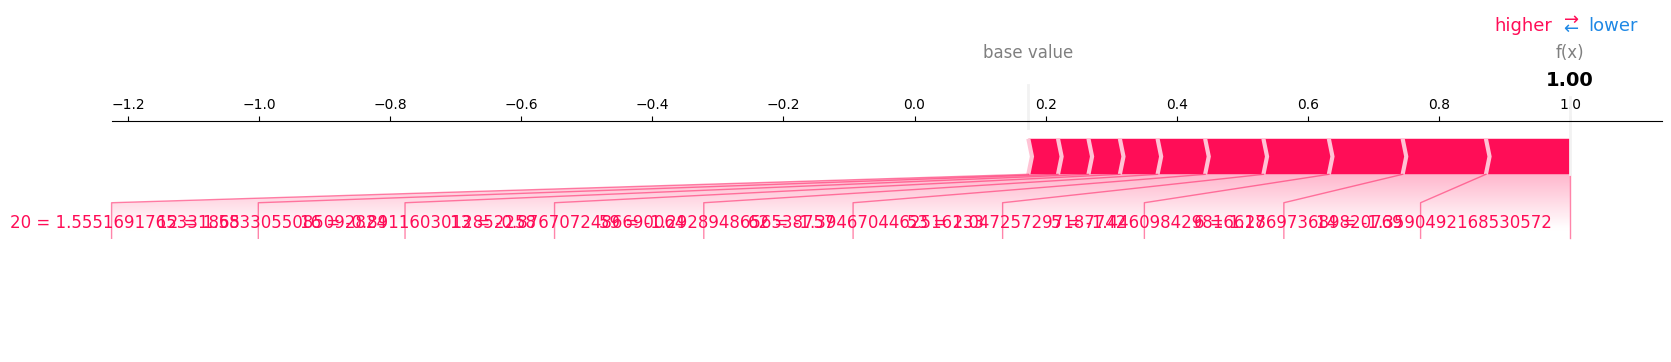

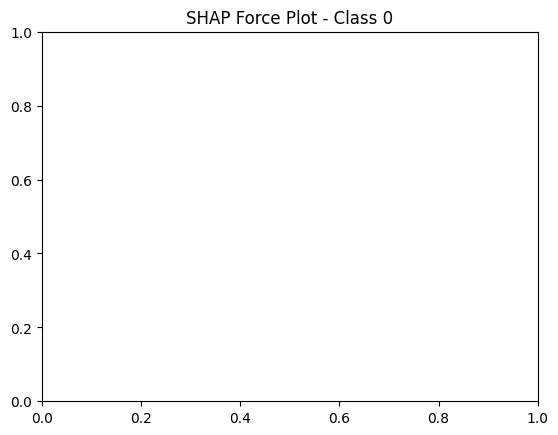

🔎 Force plot for class 1


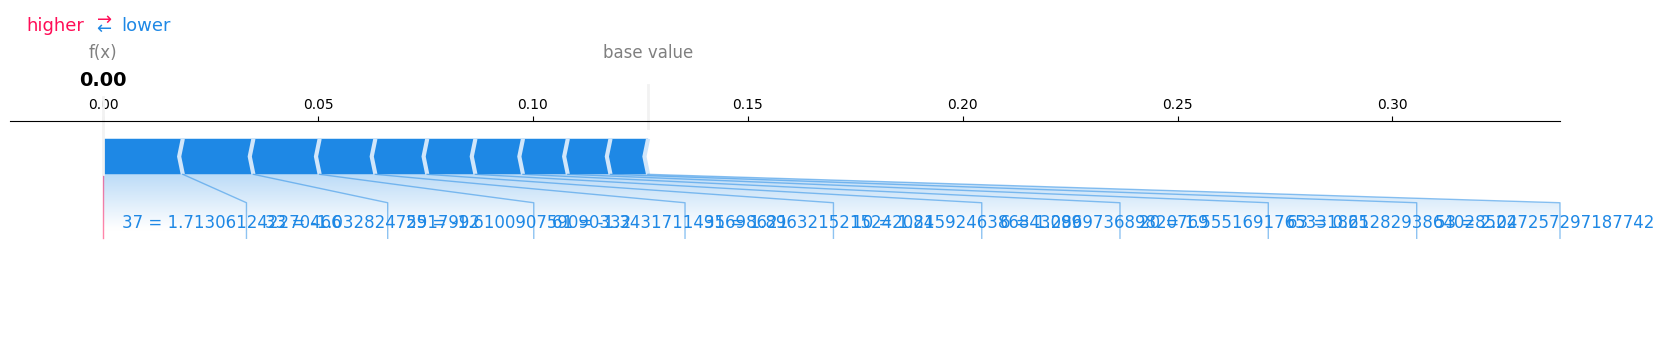

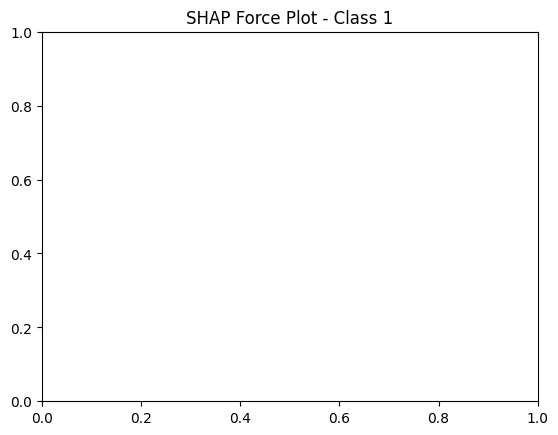

🔎 Force plot for class 2


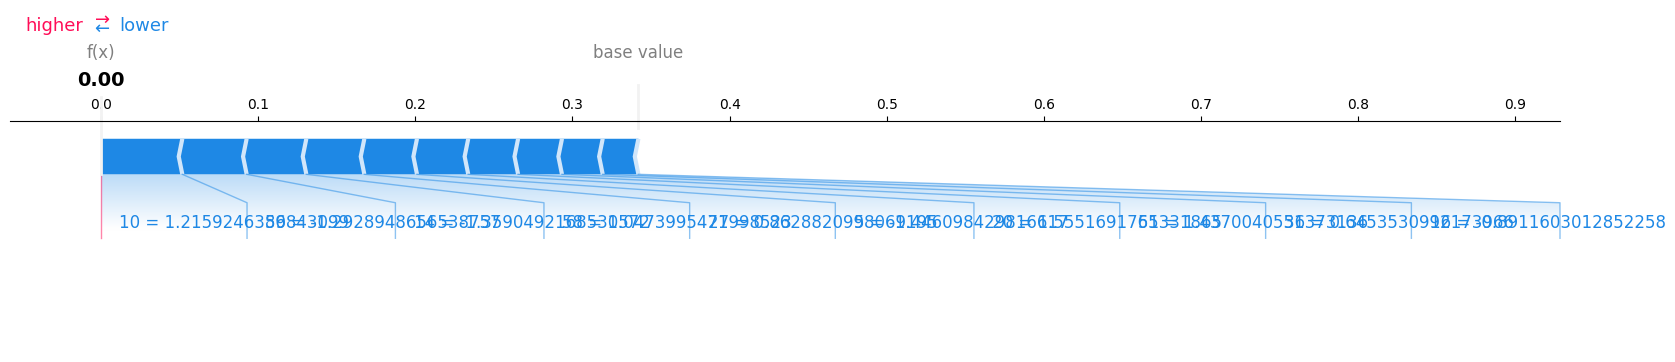

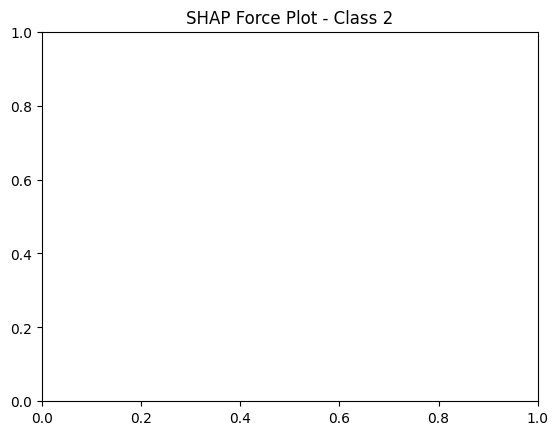

🔎 Force plot for class 3


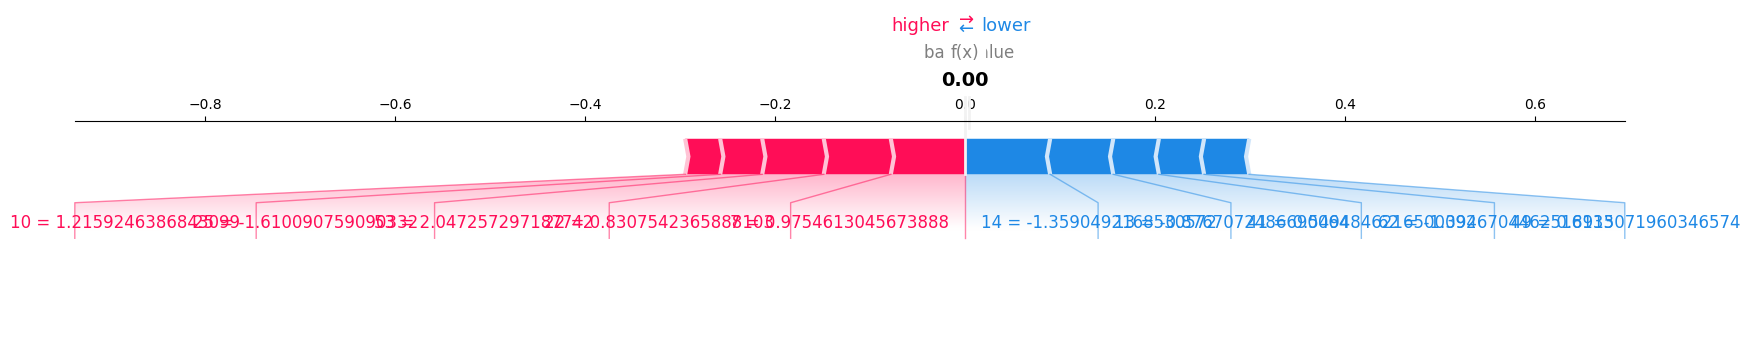

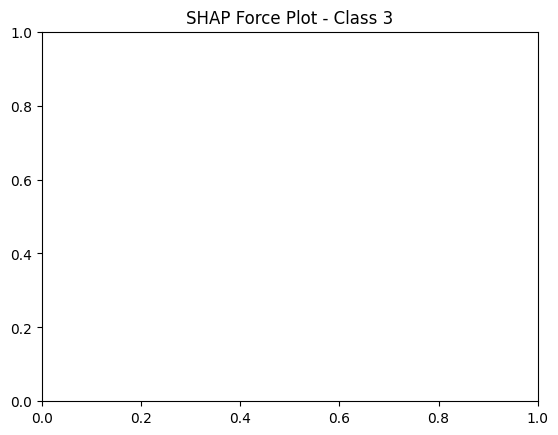

🔎 Force plot for class 4


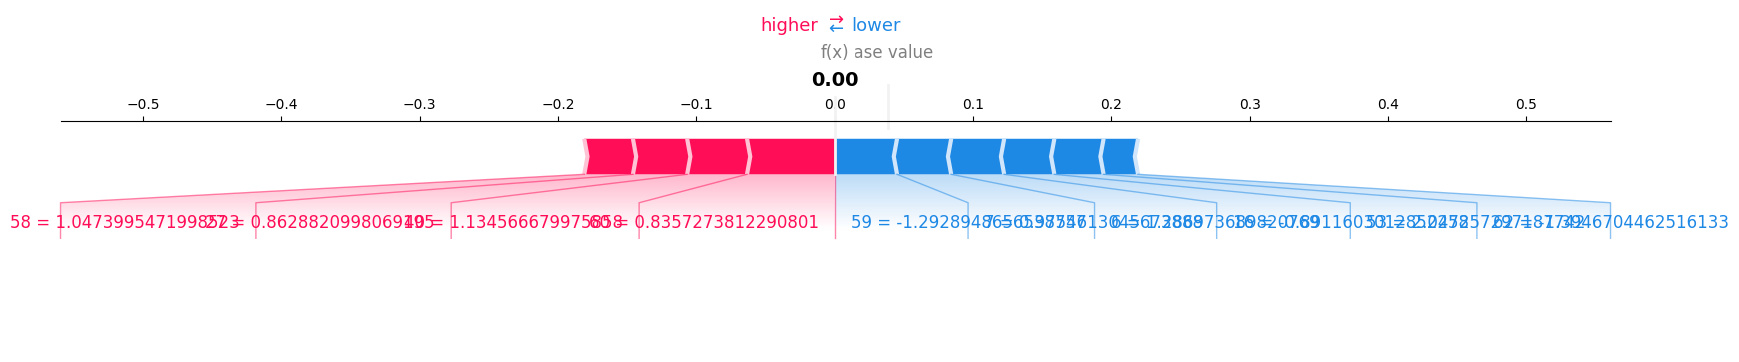

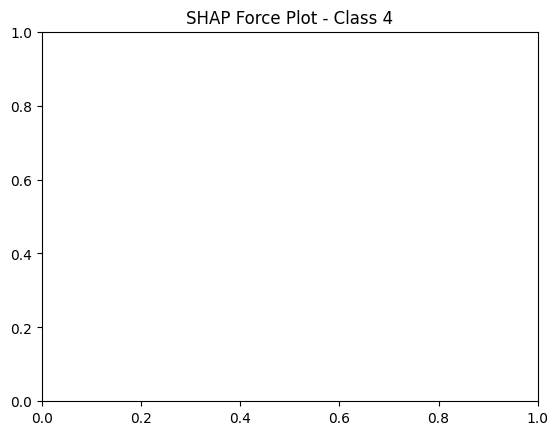

🔎 Force plot for class 5


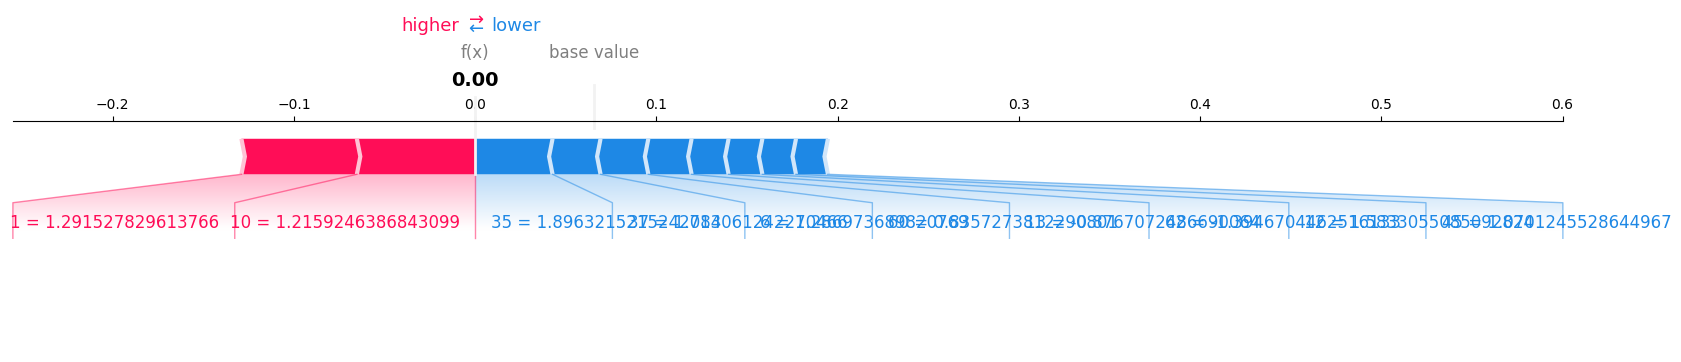

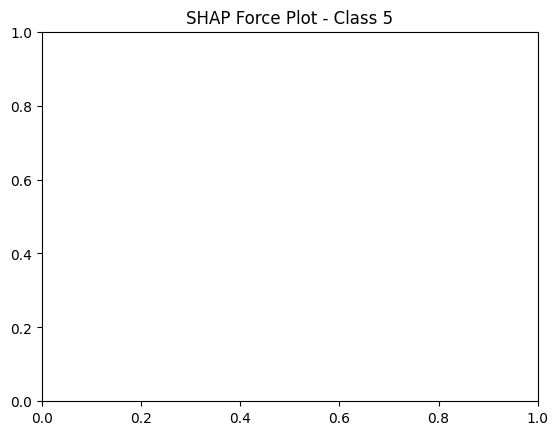

🔎 Force plot for class 6


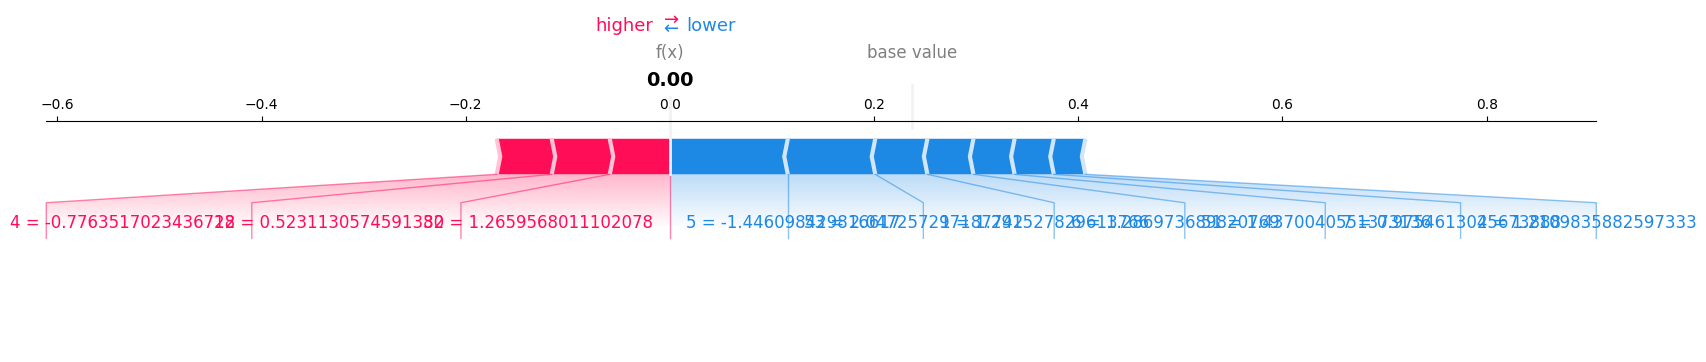

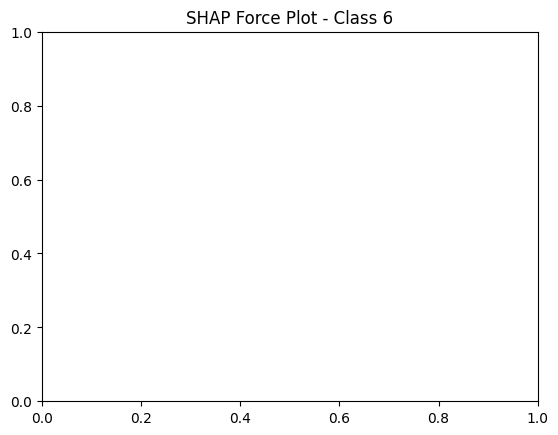

🔎 Force plot for class 7


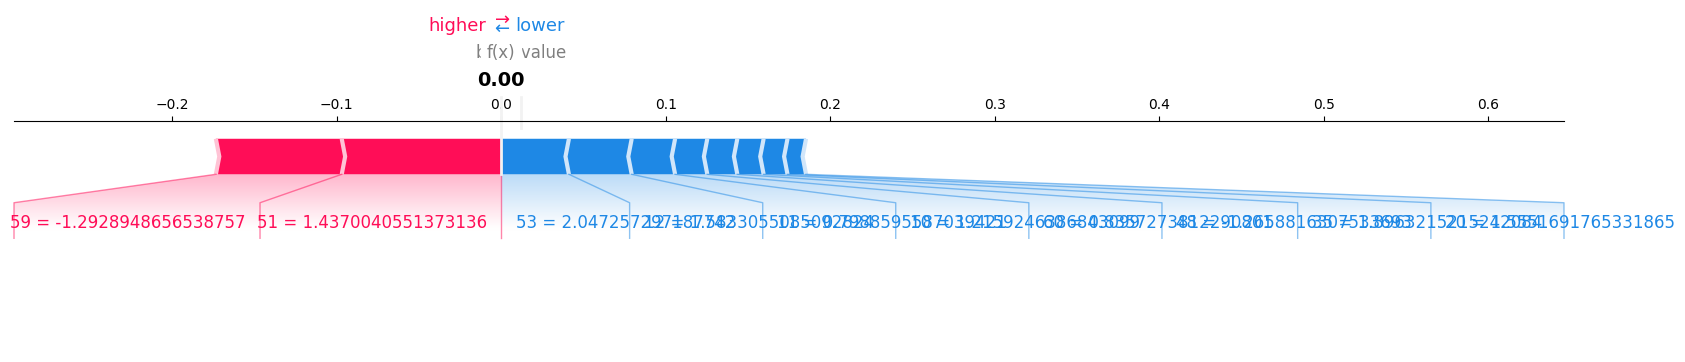

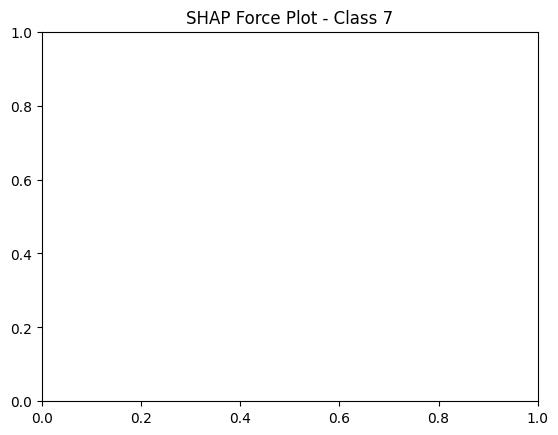

In [80]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("code2vec_feature_matrix.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns named '0', '1', ..., '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP explainer (KernelExplainer works for any model) ===
print("🔍 Computing SHAP values. This may take a few seconds...")
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)  # background dataset for SHAP
)
shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))
print("✔️ SHAP values length:", len(shap_values))

# === SHAP plotting ===
shap.initjs()

# If SHAP values are in 3D format: (1, 64, 8)
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")

    for class_idx in range(shap_values.shape[2]):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[0, :, class_idx],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        plt.title(f"SHAP Force Plot - Class {class_idx}")
        plt.show()

# If SHAP values are in list-of-arrays format (alternative fallback)
elif isinstance(shap_values, list) and len(shap_values) > predicted_class:
    print("⚠️ Using list format fallback.")
    for class_idx in range(len(shap_values)):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[class_idx][0],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        plt.title(f"SHAP Force Plot - Class {class_idx}")
        plt.show()
else:
    print("❌ SHAP format not supported for plotting.")


In [92]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 341.9 kB/s eta 0:00:00a 0:00:01


✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (7839, 64)
✅ Label vector shape: (7839,)
🔍 Computing SHAP values. This may take a few seconds...


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 0
✔️ SHAP values type: <class 'numpy.ndarray'>
✔️ SHAP values length: 1


✔️ SHAP value shape: (1, 64, 8)
🔎 Force plot for class 0


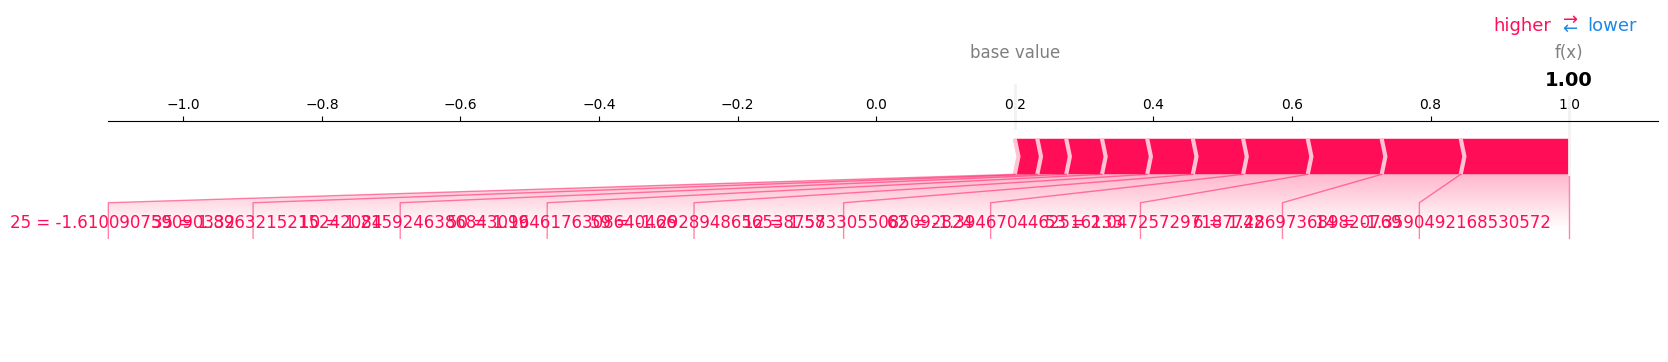

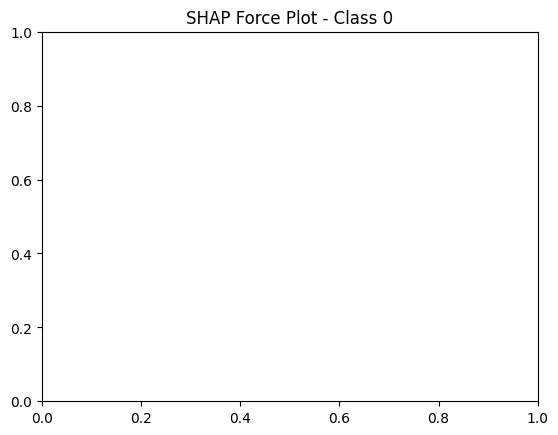

🔎 Force plot for class 1


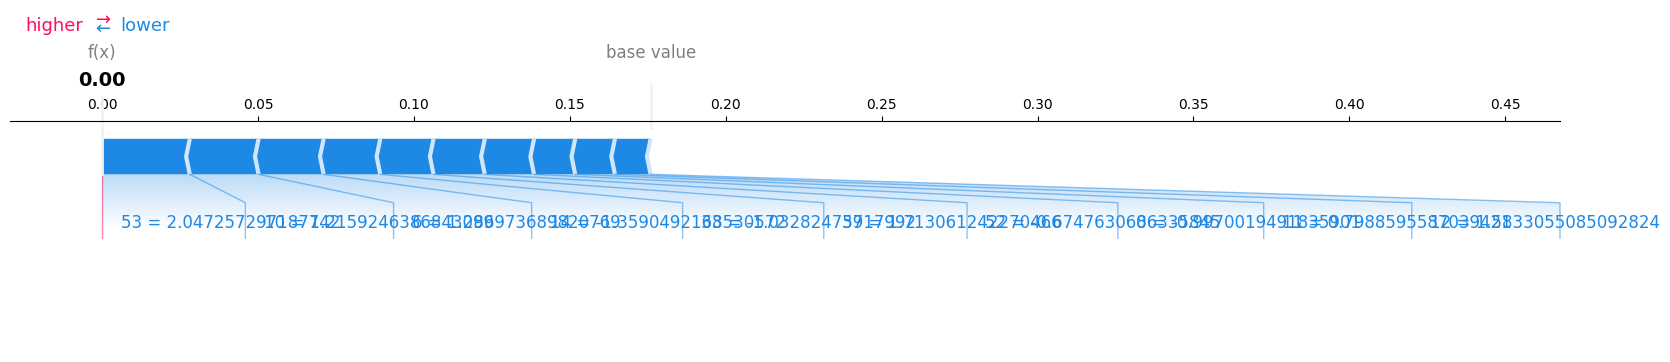

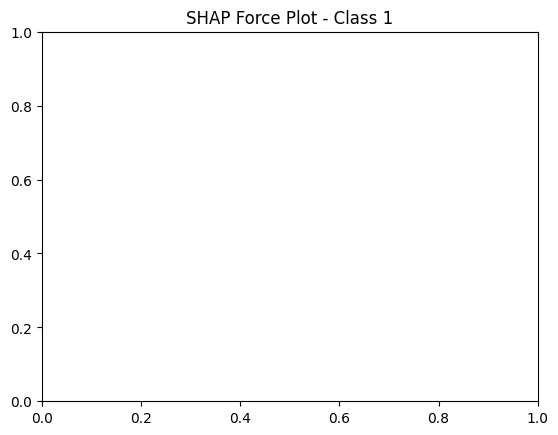

🔎 Force plot for class 2


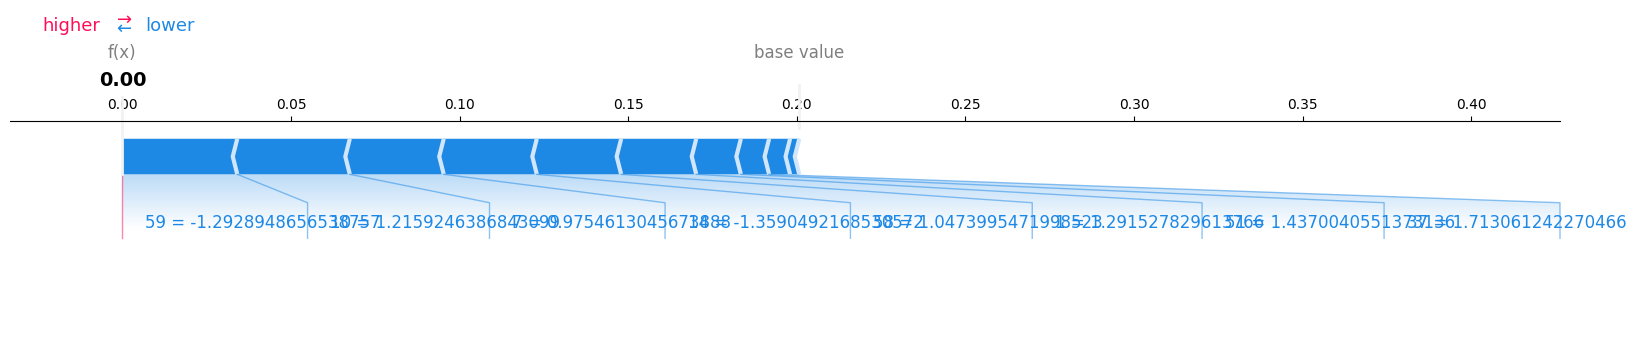

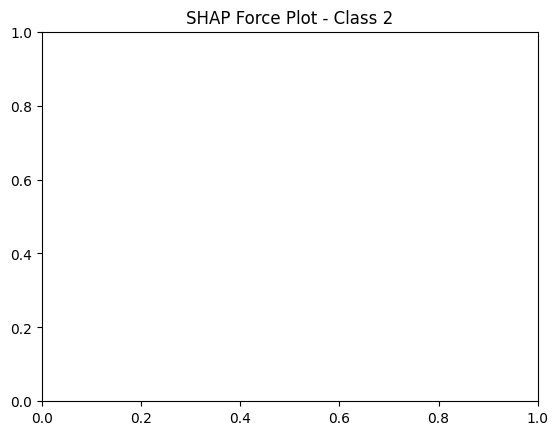

🔎 Force plot for class 3


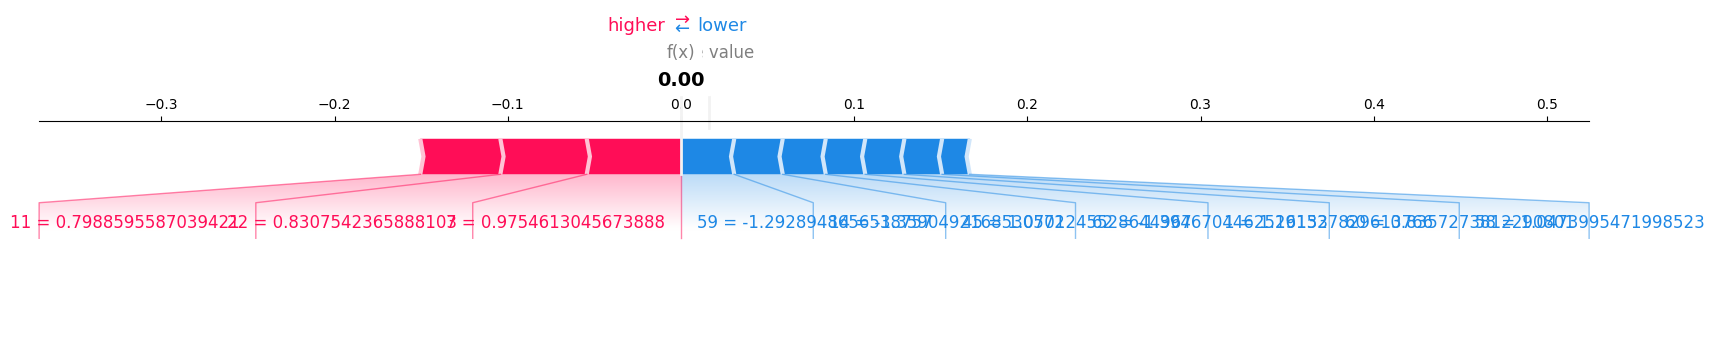

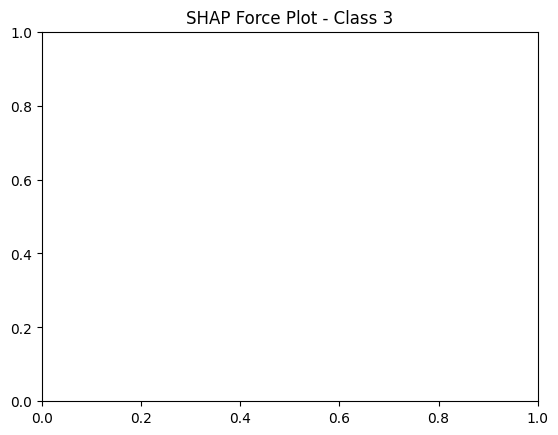

🔎 Force plot for class 4


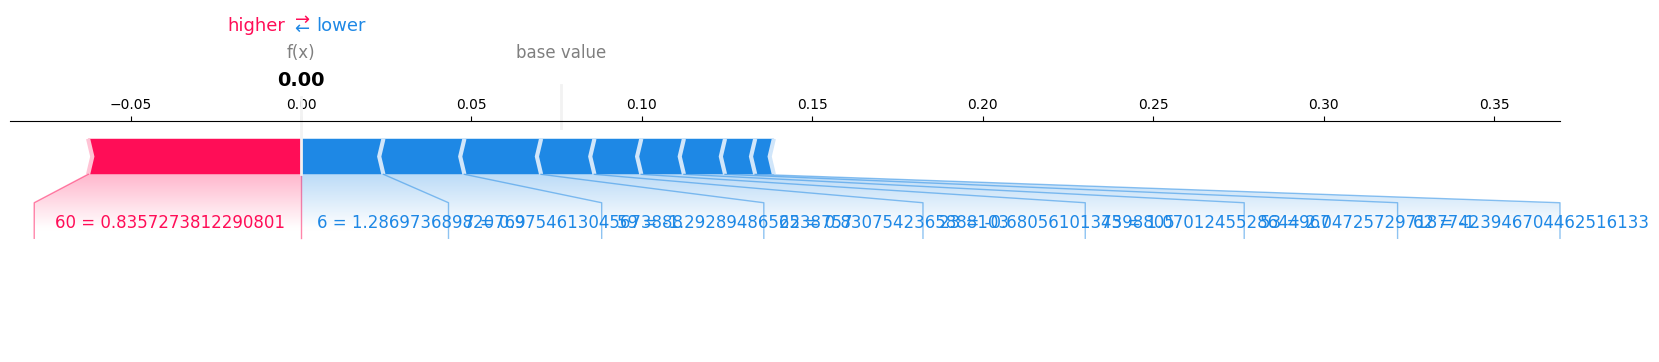

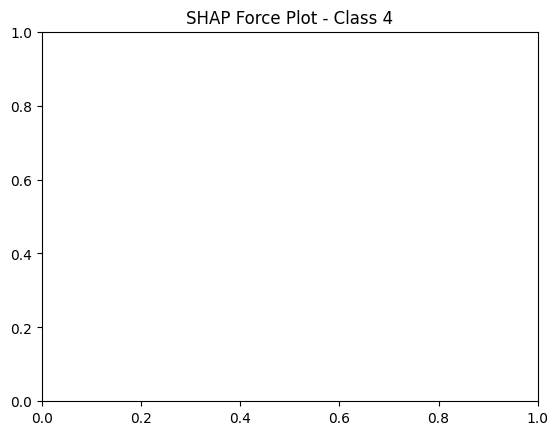

🔎 Force plot for class 5


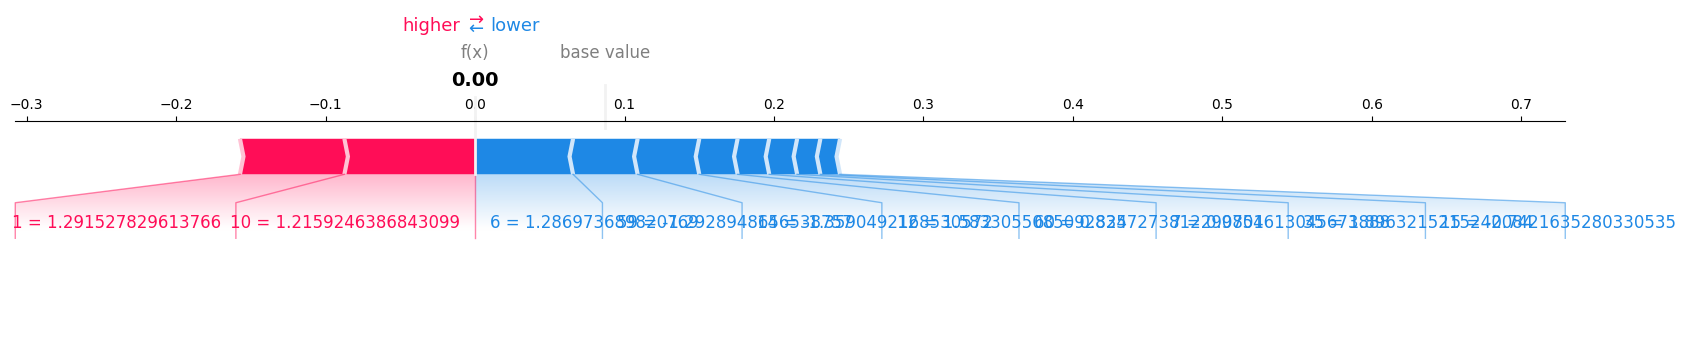

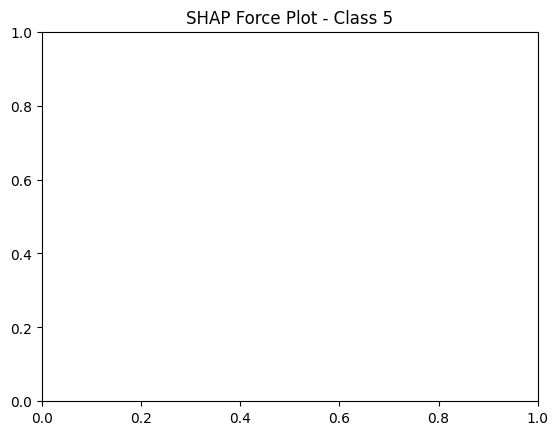

🔎 Force plot for class 6


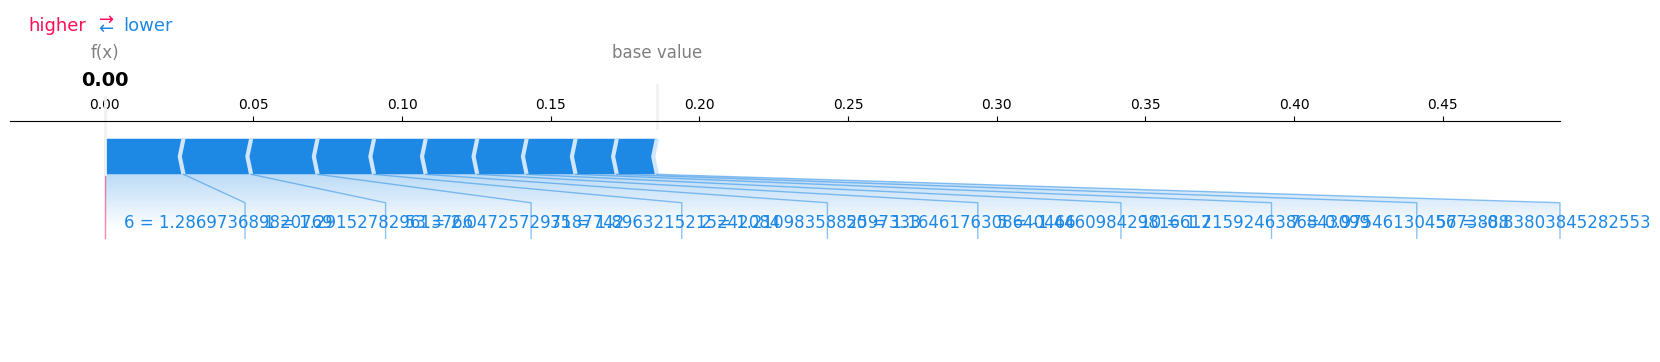

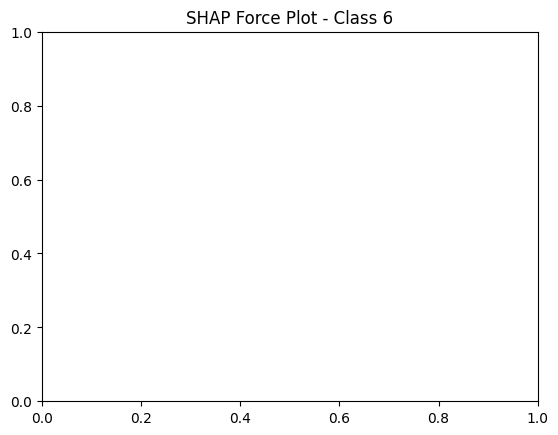

🔎 Force plot for class 7


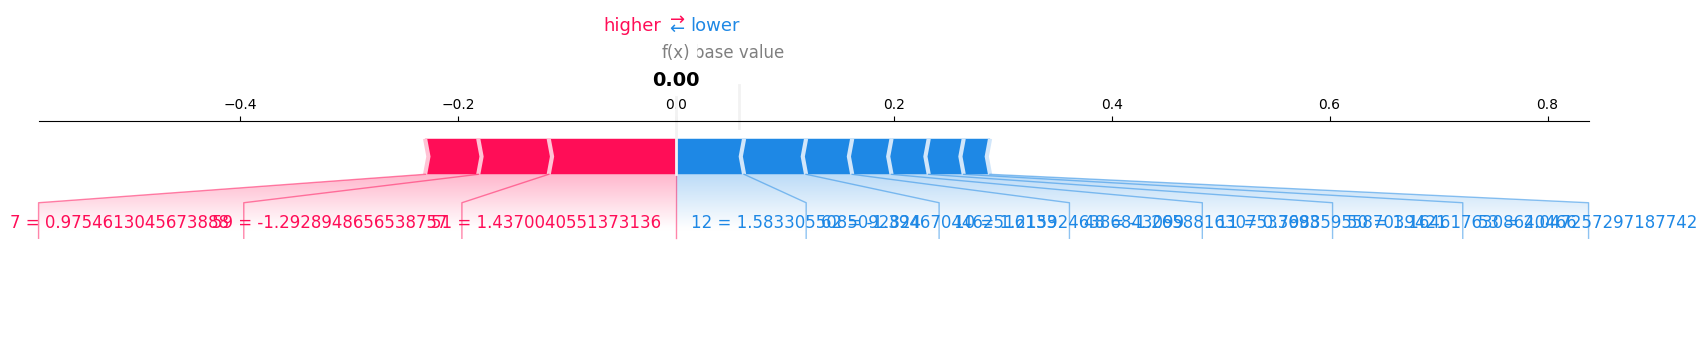

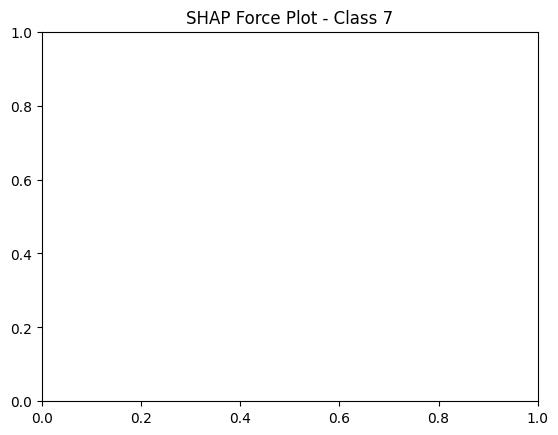

In [94]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("code2vec_feature_matrix.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns named '0', '1', ..., '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', probability=True, random_state=42)  # Set probability=True for predict_proba
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP explainer (KernelExplainer works for any model) ===
print("🔍 Computing SHAP values. This may take a few seconds...")
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)  # background dataset for SHAP
)
shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))
print("✔️ SHAP values length:", len(shap_values))

# === SHAP plotting ===
shap.initjs()

# If SHAP values are in 3D format: (1, 64, n_classes)
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")

    for class_idx in range(shap_values.shape[2]):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[0, :, class_idx],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        plt.title(f"SHAP Force Plot - Class {class_idx}")
        plt.show()

# If SHAP values are in list-of-arrays format (alternative fallback)
elif isinstance(shap_values, list) and len(shap_values) > predicted_class:
    print("⚠️ Using list format fallback.")
    for class_idx in range(len(shap_values)):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[class_idx][0],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        plt.title(f"SHAP Force Plot - Class {class_idx}")
        plt.show()
else:
    print("❌ SHAP format not supported for plotting.")


In [99]:
shap.save_html(f"/users/rojakaruppaiyan/Downloads/shap_force_class_{class_idx}.html", force_plot)


In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping (for display only) ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].astype(float).values
y = df.iloc[:, -1].values

# Load label encoder
label_encoder = joblib.load("label_encoder_aug.pkl")  # assuming both encoders have same mapping
y_encoded = label_encoder.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # === Random sample selection ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test[random_idx].reshape(1, -1)
    true_label_encoded = y_test[random_idx]
    true_label_name = encoder.inverse_transform([true_label_encoded])[0]

    # Prediction
    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = encoder.inverse_transform([pred_encoded])[0]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Evaluation on test set ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🎯 Random Sample Index: 1203
✅ True Label: 6 (encoded: 6)
🔍 Predicted Label: 6 (encoded: 6)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5 

In [121]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping (for display only) ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].astype(float).values
y = df.iloc[:, -1].values

# Load label encoder
label_encoder = joblib.load("label_encoder_aug.pkl")  # assuming both encoders have same mapping
y_encoded = label_encoder.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # === Random sample selection ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test[random_idx].reshape(1, -1)
    true_label_encoded = y_test[random_idx]
    true_label_name = encoder.inverse_transform([true_label_encoded])[0]

    # Prediction
    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = encoder.inverse_transform([pred_encoded])[0]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Evaluation on test set ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🎯 Random Sample Index: 1556
✅ True Label: 1 (encoded: 1)
🔍 Predicted Label: 1 (encoded: 1)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5 

In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping (for display only) ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].astype(float).values
y = df.iloc[:, -1].values

# Load label encoder
label_encoder = joblib.load("label_encoder_aug.pkl")  # assuming both encoders have same mapping
y_encoded = label_encoder.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # === Random sample selection ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test[random_idx].reshape(1, -1)
    true_label_encoded = y_test[random_idx]
    true_label_name = encoder.inverse_transform([true_label_encoded])[0]

    # Prediction
    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = encoder.inverse_transform([pred_encoded])[0]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Evaluation on test set ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🎯 Random Sample Index: 197
✅ True Label: 0 (encoded: 0)
🔍 Predicted Label: 0 (encoded: 0)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5  

In [123]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping (for display only) ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and preprocess dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv", header=None)
df = df[df.iloc[:, -1] != 'label']
X = df.iloc[:, :-1].astype(float).values
y = df.iloc[:, -1].values

# Load label encoder
label_encoder = joblib.load("label_encoder_aug.pkl")  # assuming both encoders have same mapping
y_encoded = label_encoder.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# === Generalized evaluation function for MLP ===
def evaluate_mlp(model_path, scaler_path, encoder_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model, scaler, encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # === Random sample selection ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test[random_idx].reshape(1, -1)
    true_label_encoded = y_test[random_idx]
    true_label_name = encoder.inverse_transform([true_label_encoded])[0]

    # Prediction
    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = encoder.inverse_transform([pred_encoded])[0]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Evaluation on test set ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_mlp("mlp_model_no_aug.pkl", "scaler_no_aug.pkl", "label_encoder_no_aug.pkl", "MLP WITHOUT Augmentation")
evaluate_mlp("mlp_model_aug.pkl", "scaler_aug.pkl", "label_encoder_aug.pkl", "MLP WITH Augmentation")



🔎 Model: MLP WITHOUT Augmentation
🎯 Random Sample Index: 1537
✅ True Label: 7 (encoded: 7)
🔍 Predicted Label: 6 (encoded: 6)

📊 Test Set Evaluation:
🎯 Accuracy: 80.42%
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       296
           1       0.89      0.85      0.87       306
           2       0.78      0.88      0.83       306
           3       0.83      0.51      0.63        39
           4       0.67      0.73      0.70       107
           5       0.79      0.59      0.68       110
           6       0.82      0.78      0.80       262
           7       0.79      0.81      0.80       142

    accuracy                           0.80      1568
   macro avg       0.80      0.75      0.77      1568
weighted avg       0.81      0.80      0.80      1568

📉 Confusion Matrix:
[[250   6  19   0  12   2   5   2]
 [  7 261  14   1   8   2   6   7]
 [  9   8 268   1   4   2  11   3]
 [  3   1   3  20   4   2   5 

In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"]).astype(float)
y = df["label"]

# No encoding needed; labels already numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Generalized evaluation function for SVM ===
def evaluate_and_predict(model_path, scaler_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # === Random sample prediction ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test.iloc[random_idx].values.reshape(1, -1)
    true_label_encoded = y_test.iloc[random_idx]
    true_label_name = label_mapping[int(true_label_encoded)]

    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = label_mapping[int(pred_encoded)]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Full test set evaluation ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping)]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", "SVM WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "SVM WITHOUT Augmentation")



🔎 Model: SVM WITH Augmentation
🎯 Random Sample Index: 1185
✅ True Label: hnv (encoded: 2)
🔍 Predicted Label: hnv (encoded: 2)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [126]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"]).astype(float)
y = df["label"]

# No encoding needed; labels already numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Generalized evaluation function for SVM ===
def evaluate_and_predict(model_path, scaler_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # === Random sample prediction ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test.iloc[random_idx].values.reshape(1, -1)
    true_label_encoded = y_test.iloc[random_idx]
    true_label_name = label_mapping[int(true_label_encoded)]

    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = label_mapping[int(pred_encoded)]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Full test set evaluation ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping)]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", "SVM WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "SVM WITHOUT Augmentation")



🔎 Model: SVM WITH Augmentation
🎯 Random Sample Index: 204
✅ True Label: key (encoded: 5)
🔍 Predicted Label: key (encoded: 5)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [127]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"]).astype(float)
y = df["label"]

# No encoding needed; labels already numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Generalized evaluation function for SVM ===
def evaluate_and_predict(model_path, scaler_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # === Random sample prediction ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test.iloc[random_idx].values.reshape(1, -1)
    true_label_encoded = y_test.iloc[random_idx]
    true_label_name = label_mapping[int(true_label_encoded)]

    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = label_mapping[int(pred_encoded)]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Full test set evaluation ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping)]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", "SVM WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "SVM WITHOUT Augmentation")



🔎 Model: SVM WITH Augmentation
🎯 Random Sample Index: 830
✅ True Label: hnv (encoded: 2)
🔍 Predicted Label: hnv (encoded: 2)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [5]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"]).astype(float)
y = df["label"]

# No encoding needed; labels already numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Generalized evaluation function for SVM ===
def evaluate_and_predict(model_path, scaler_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # === Random sample prediction ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test.iloc[random_idx].values.reshape(1, -1)
    true_label_encoded = y_test.iloc[random_idx]
    true_label_name = label_mapping[int(true_label_encoded)]

    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = label_mapping[int(pred_encoded)]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Full test set evaluation ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping)]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", "SVM WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "SVM WITHOUT Augmentation")



🔎 Model: SVM WITH Augmentation
🎯 Random Sample Index: 582
✅ True Label: hnv (encoded: 2)
🔍 Predicted Label: hnv (encoded: 2)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

In [129]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# === Label Mapping ===
label_mapping = {
    0: 'cipher',
    1: 'hash',
    2: 'hnv',
    3: 'hnvor',
    4: 'iv',
    5: 'key',
    6: 'tm',
    7: 'tls'
}

# === Load and split dataset ===
df = pd.read_csv("code2vec_feature_matrix.csv")
X = df.drop(columns=["label"]).astype(float)
y = df["label"]

# No encoding needed; labels already numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Generalized evaluation function for SVM ===
def evaluate_and_predict(model_path, scaler_path, model_name):
    print(f"\n🔎 Model: {model_name}")

    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # === Random sample prediction ===
    random_idx = random.randint(0, len(X_test) - 1)
    input_vector = X_test.iloc[random_idx].values.reshape(1, -1)
    true_label_encoded = y_test.iloc[random_idx]
    true_label_name = label_mapping[int(true_label_encoded)]

    input_scaled = scaler.transform(input_vector)
    pred_encoded = model.predict(input_scaled)[0]
    pred_label_name = label_mapping[int(pred_encoded)]

    print(f"🎯 Random Sample Index: {random_idx}")
    print(f"✅ True Label: {true_label_name} (encoded: {true_label_encoded})")
    print(f"🔍 Predicted Label: {pred_label_name} (encoded: {pred_encoded})")

    # === Full test set evaluation ===
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)

    print("\n📊 Test Set Evaluation:")
    print(f"🎯 Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping)]))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for both models ===
evaluate_and_predict("svm_best_model.pkl", "scaler.pkl", "SVM WITH Augmentation")
evaluate_and_predict("svm_aug_better_model.pkl", "scaler_aug_better.pkl", "SVM WITHOUT Augmentation")



🔎 Model: SVM WITH Augmentation
🎯 Random Sample Index: 11
✅ True Label: key (encoded: 5)
🔍 Predicted Label: cipher (encoded: 0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 83.99%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.82      0.88      0.85       296
        hash       0.88      0.91      0.89       306
         hnv       0.82      0.90      0.86       306
       hnvor       0.96      0.59      0.73        39
          iv       0.86      0.73      0.79       107
         key       0.85      0.65      0.74       110
          tm       0.81      0.83      0.82       262
         tls       0.87      0.80      0.84       142

    accuracy                           0.84      1568
   macro avg       0.86      0.79      0.81      1568
weighted avg       0.84      0.84      0.84      1568

📉 Confusion Matrix:
[[260   3  15   0   3   3  10   2]
 [  5 277  10   0   4   0   7   3]
 [  6  12 275   0   1   1   9   2]
 [  4   1   4  23   0   0   6   1]
 [ 10   5   4   0  78   6   4   0]
 [ 15   7   8   0   4  72   4   0]
 [ 11   9  14   0   1   0 218   9]
 [  7   2   4   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



📊 Test Set Evaluation:
🎯 Accuracy: 82.08%
📋 Classification Report:
              precision    recall  f1-score   support

      cipher       0.78      0.85      0.81       296
        hash       0.81      0.89      0.85       306
         hnv       0.84      0.87      0.85       306
       hnvor       0.74      0.59      0.66        39
          iv       0.90      0.78      0.83       107
         key       0.79      0.67      0.73       110
          tm       0.85      0.79      0.82       262
         tls       0.84      0.76      0.80       142

    accuracy                           0.82      1568
   macro avg       0.82      0.78      0.79      1568
weighted avg       0.82      0.82      0.82      1568

📉 Confusion Matrix:
[[253  14  11   2   2   6   7   1]
 [ 11 272  11   0   2   1   4   5]
 [ 13  12 267   1   0   2   8   3]
 [  5   2   3  23   2   0   2   2]
 [  7   5   2   0  83   5   5   0]
 [ 15   8   6   3   2  74   2   0]
 [ 12  15  13   1   1   3 207  10]
 [  9   7   6   

✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (7839, 64)
✅ Label vector shape: (7839,)
🔍 Computing SHAP values. This may take a few seconds...


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 0
✔️ SHAP values type: <class 'numpy.ndarray'>


✔️ SHAP value shape: (1, 64, 8)
🔎 Force plot for class 0


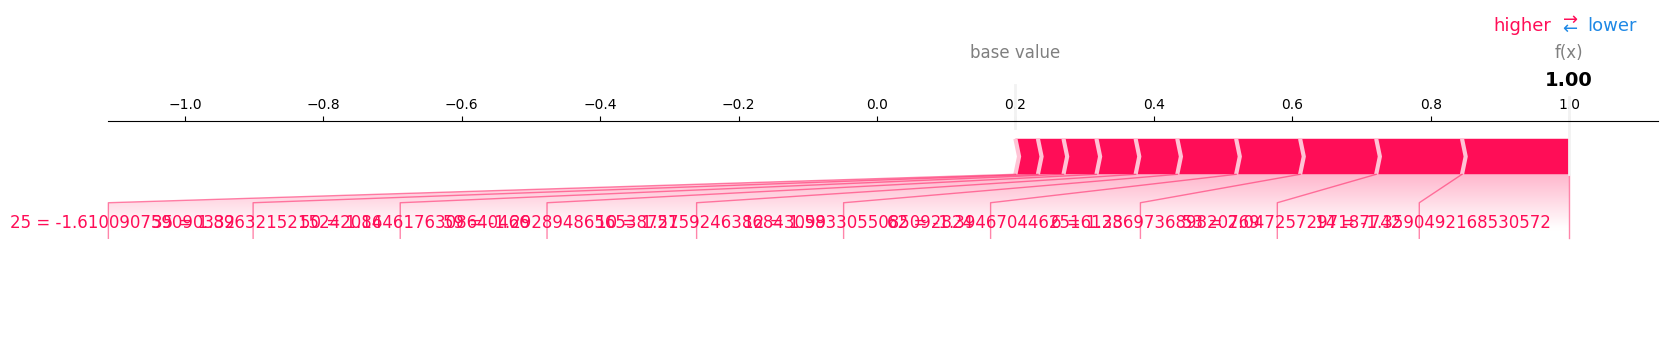

🔎 Force plot for class 1


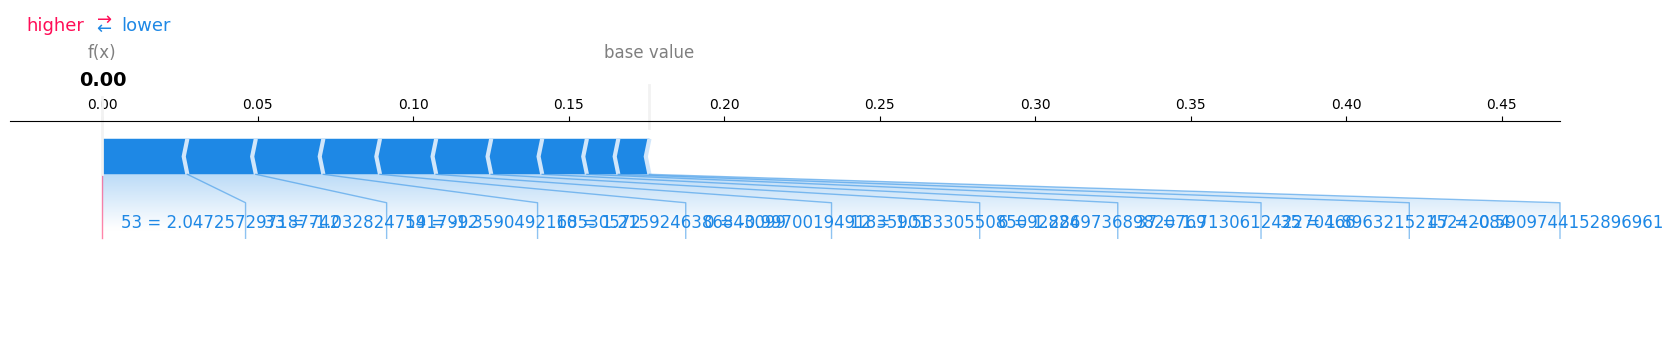

🔎 Force plot for class 2


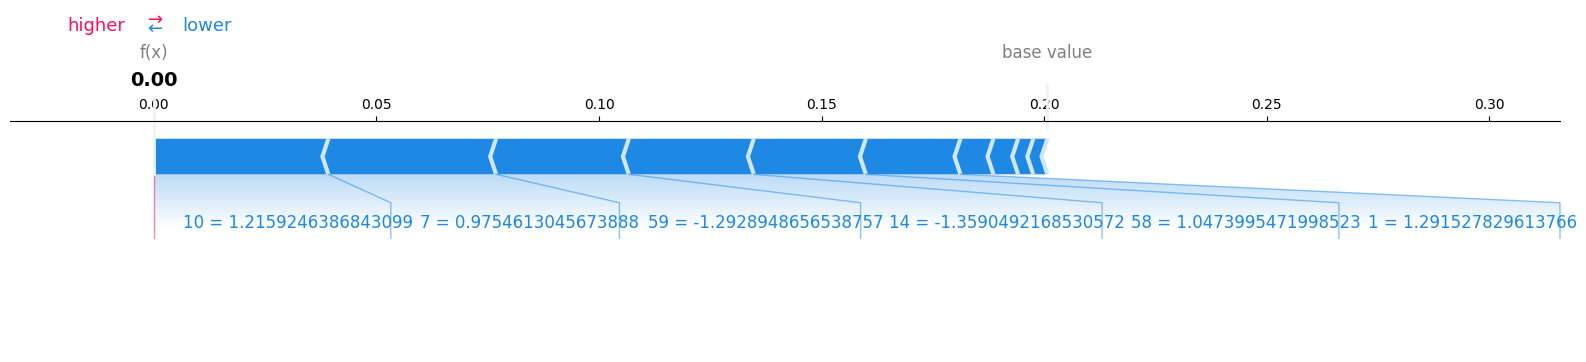

🔎 Force plot for class 3


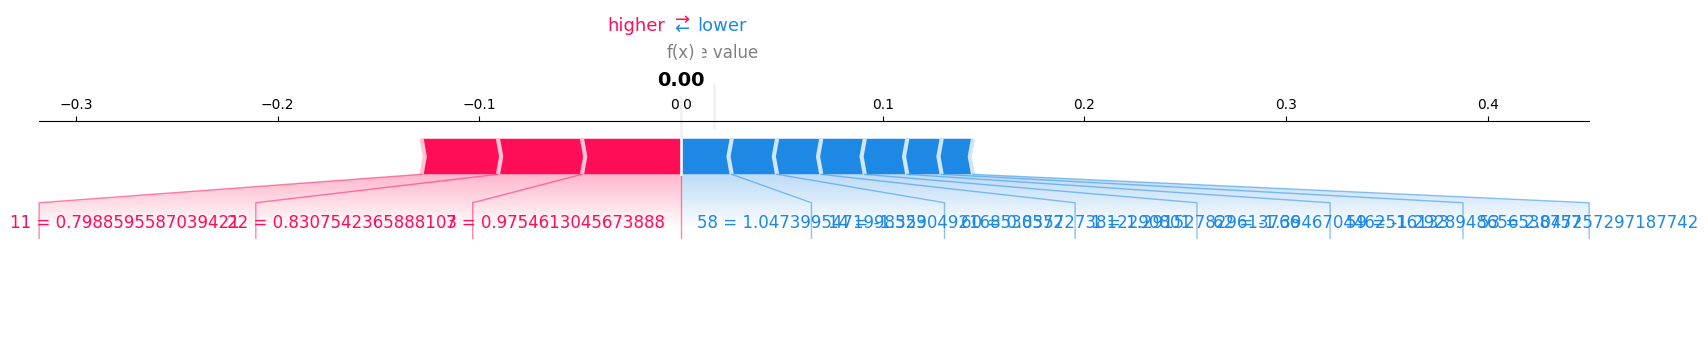

🔎 Force plot for class 4


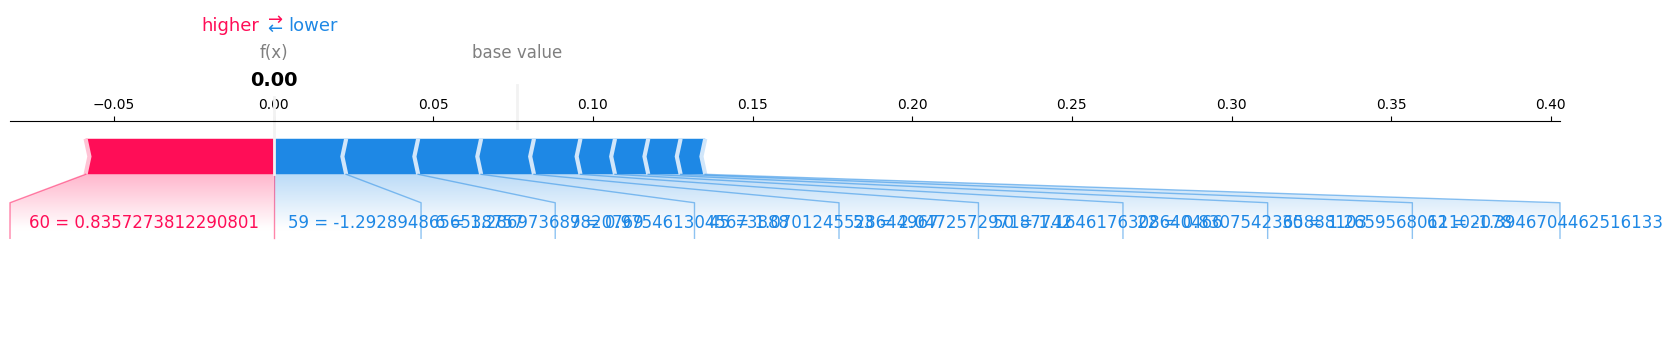

🔎 Force plot for class 5


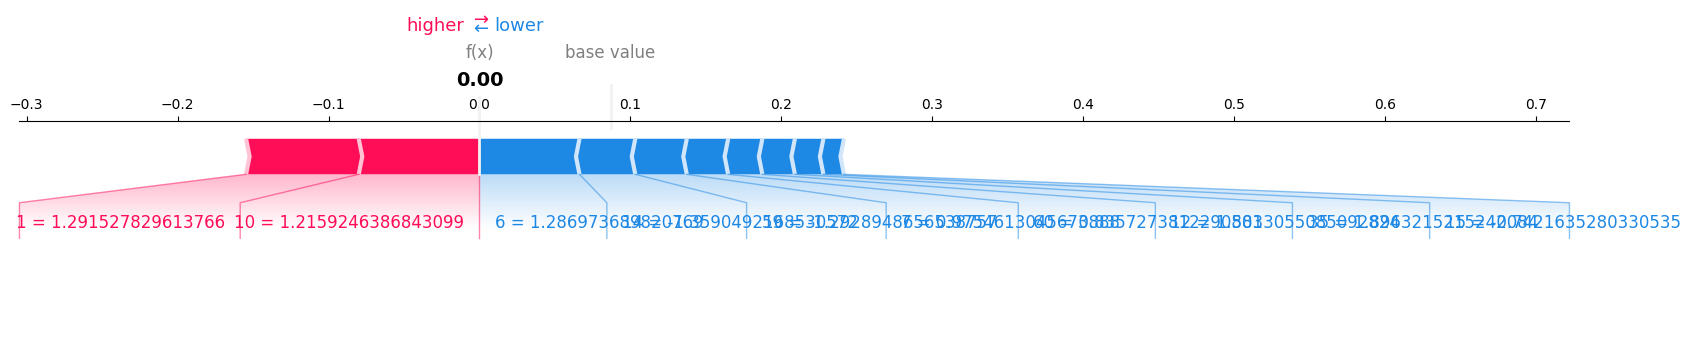

🔎 Force plot for class 6


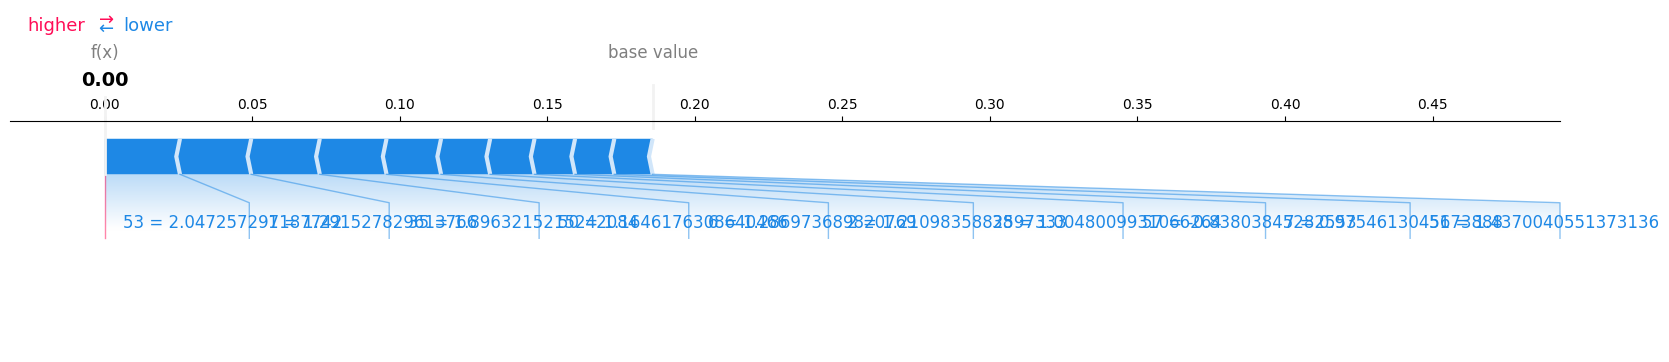

🔎 Force plot for class 7


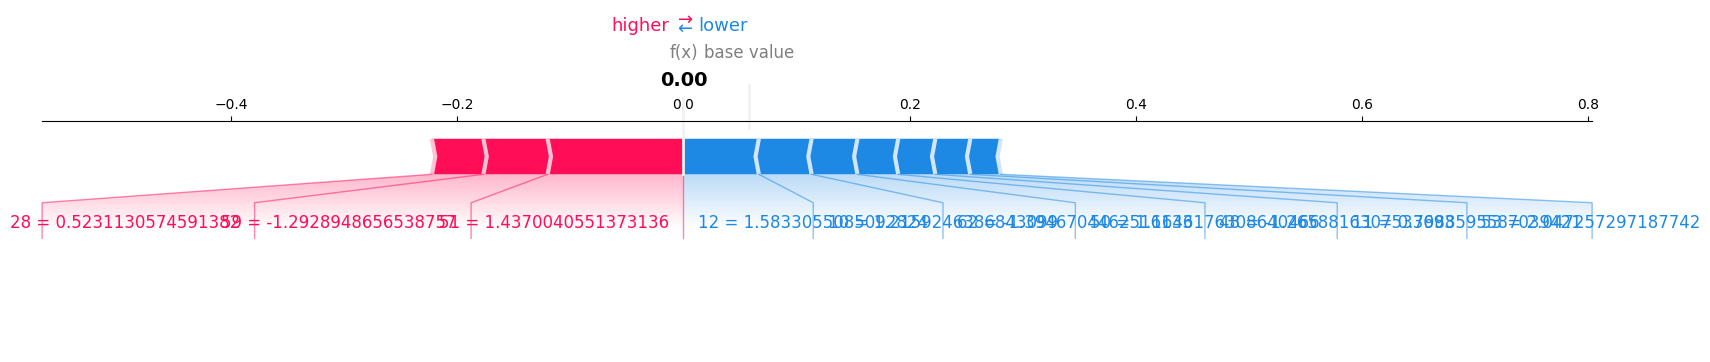

In [15]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("code2vec_feature_matrix.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns named '0' to '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP Explainer ===
print("🔍 Computing SHAP values. This may take a few seconds...")
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)
)
shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))

# === SHAP plotting ===
shap.initjs()

# === Handle SHAP values in NumPy format: (1, 64, num_classes) ===
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")
    for class_idx in range(shap_values.shape[2]):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[0, :, class_idx],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
         
# === Alternative fallback for list-of-arrays format ===
elif isinstance(shap_values, list) and len(shap_values) > predicted_class:
    print("⚠️ Using fallback for list-of-arrays SHAP values.")
    for class_idx in range(len(shap_values)):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[class_idx][0],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        
else:
    print("❌ SHAP format not supported for plotting.")


✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (7839, 64)
✅ Label vector shape: (7839,)
🔍 Computing SHAP values. This may take a few seconds...


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 0
✔️ SHAP values type: <class 'numpy.ndarray'>


✔️ SHAP value shape: (1, 64, 8)
🔎 Force plot for class 0


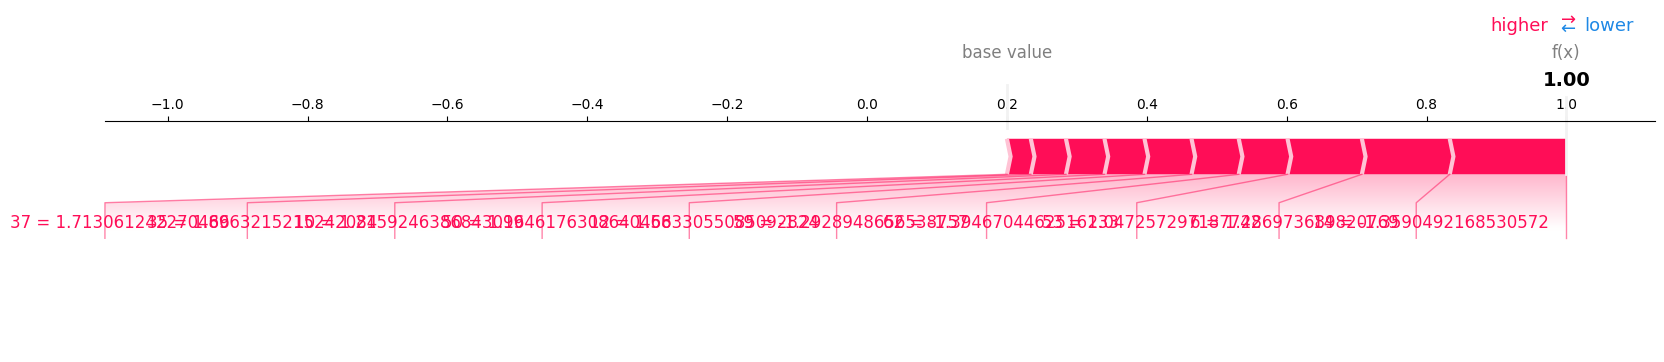

🔎 Force plot for class 1


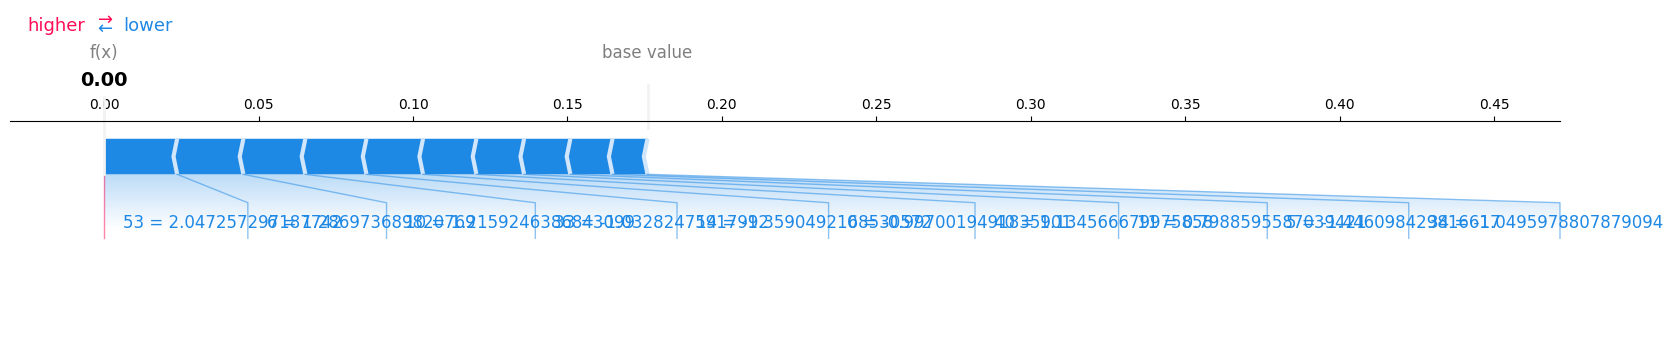

🔎 Force plot for class 2


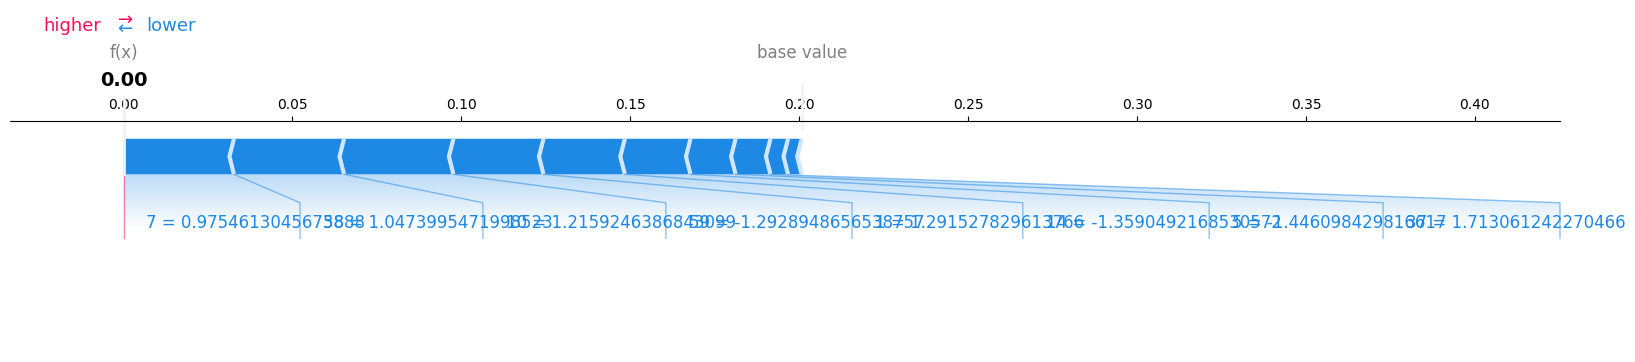

🔎 Force plot for class 3


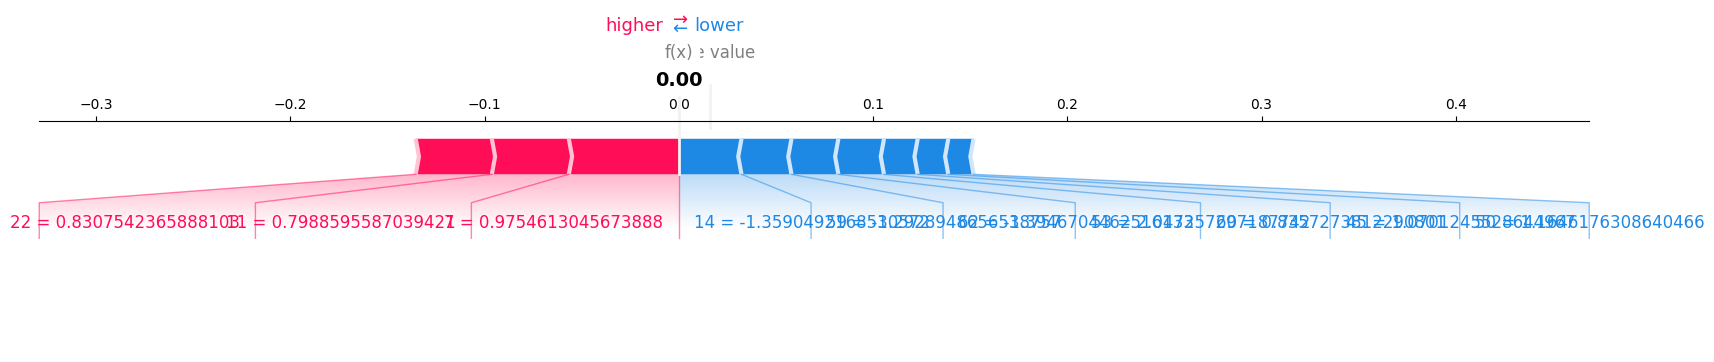

🔎 Force plot for class 4


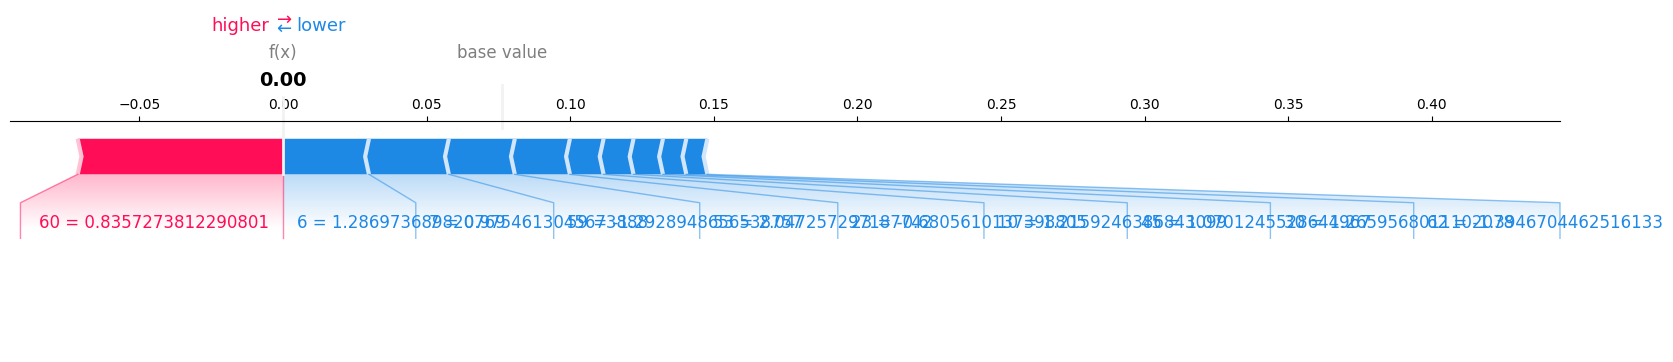

🔎 Force plot for class 5


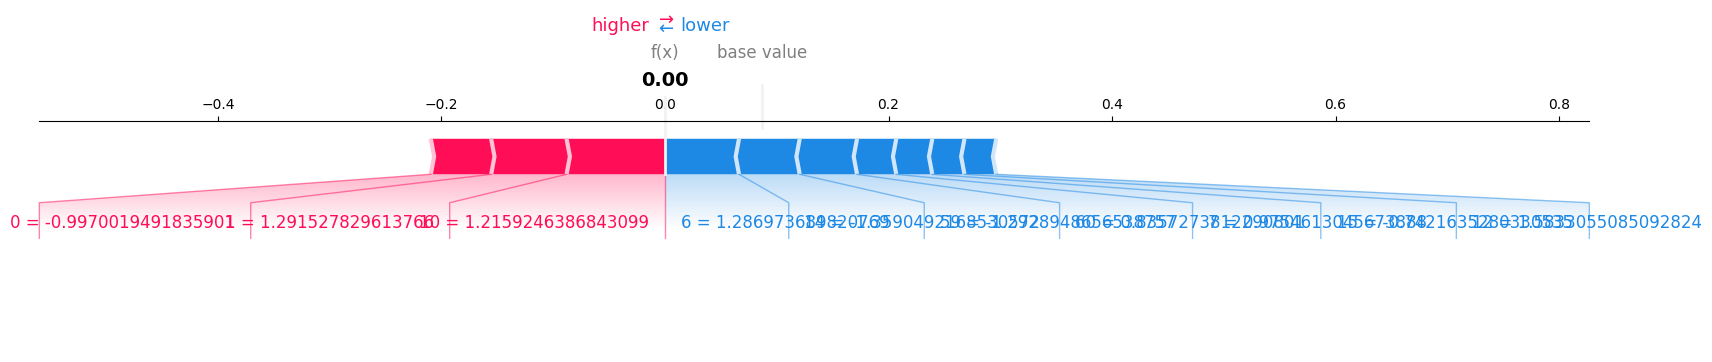

🔎 Force plot for class 6


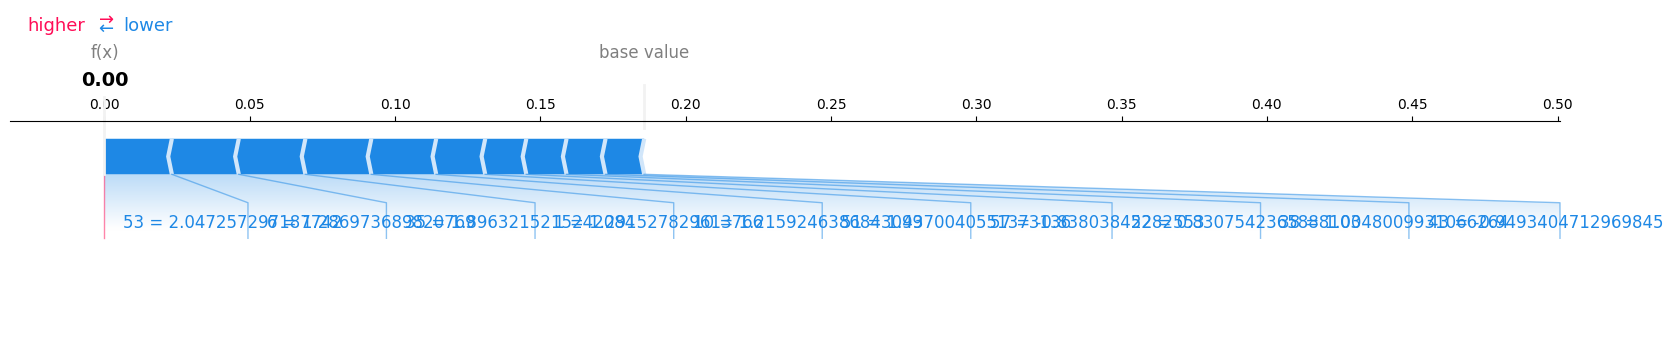

🔎 Force plot for class 7


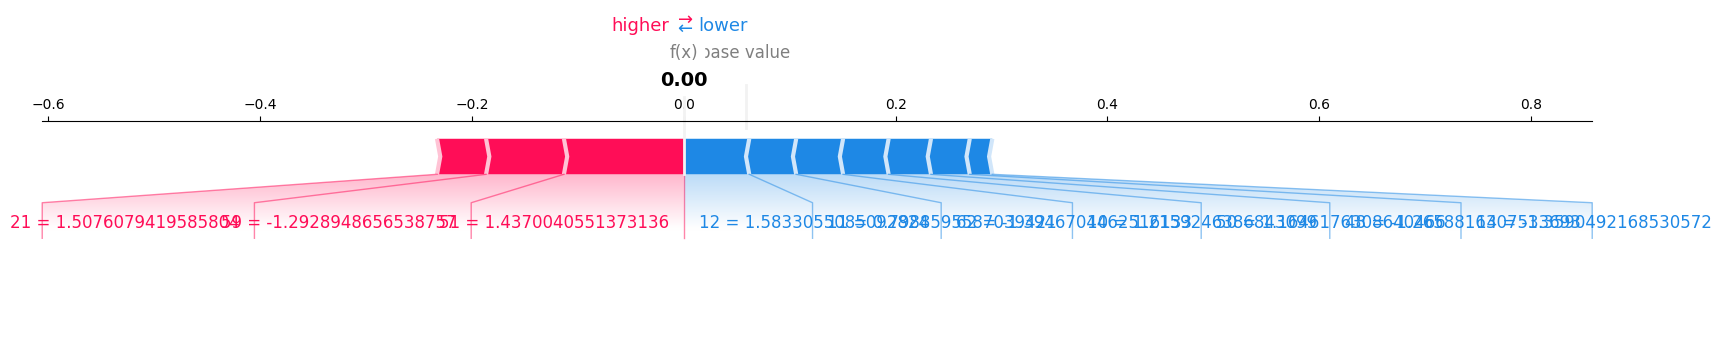

In [16]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("bog_features1.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns named '0' to '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP Explainer ===
print("🔍 Computing SHAP values. This may take a few seconds...")
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)
)
shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))

# === SHAP plotting ===
shap.initjs()

# === Handle SHAP values in NumPy format: (1, 64, num_classes) ===
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")
    for class_idx in range(shap_values.shape[2]):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[0, :, class_idx],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
         
# === Alternative fallback for list-of-arrays format ===
elif isinstance(shap_values, list) and len(shap_values) > predicted_class:
    print("⚠️ Using fallback for list-of-arrays SHAP values.")
    for class_idx in range(len(shap_values)):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[class_idx][0],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        
else:
    print("❌ SHAP format not supported for plotting.")


✔️ Loaded dataset. Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'label']
✅ Feature matrix shape: (10063, 64)
✅ Label vector shape: (10063,)
🔍 Computing SHAP values. This may take a few seconds...


  0%|          | 0/1 [00:00<?, ?it/s]

✅ Predicted class: 7
✔️ SHAP values type: <class 'numpy.ndarray'>


✔️ SHAP value shape: (1, 64, 8)
🔎 Force plot for class 0


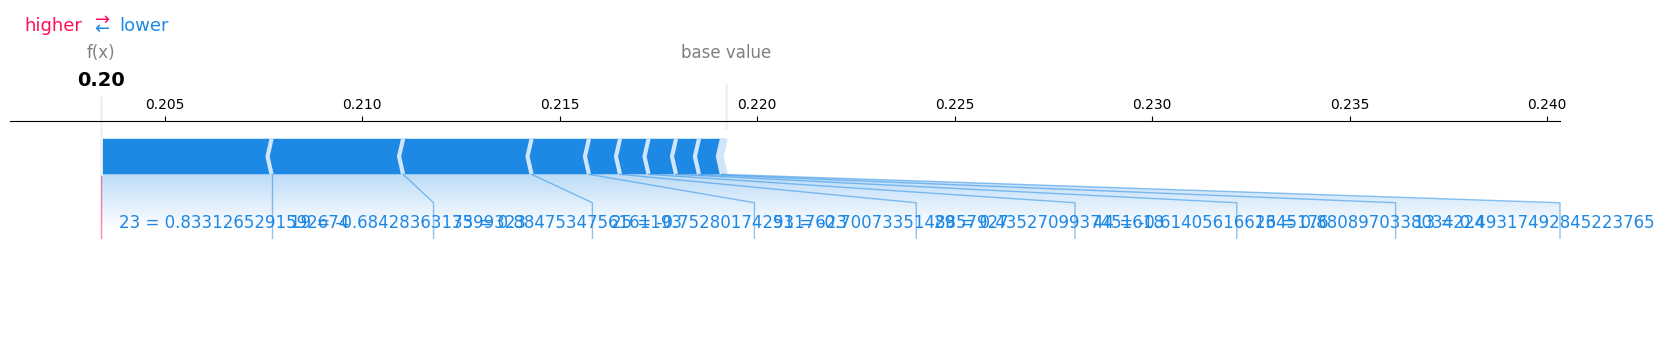

🔎 Force plot for class 1


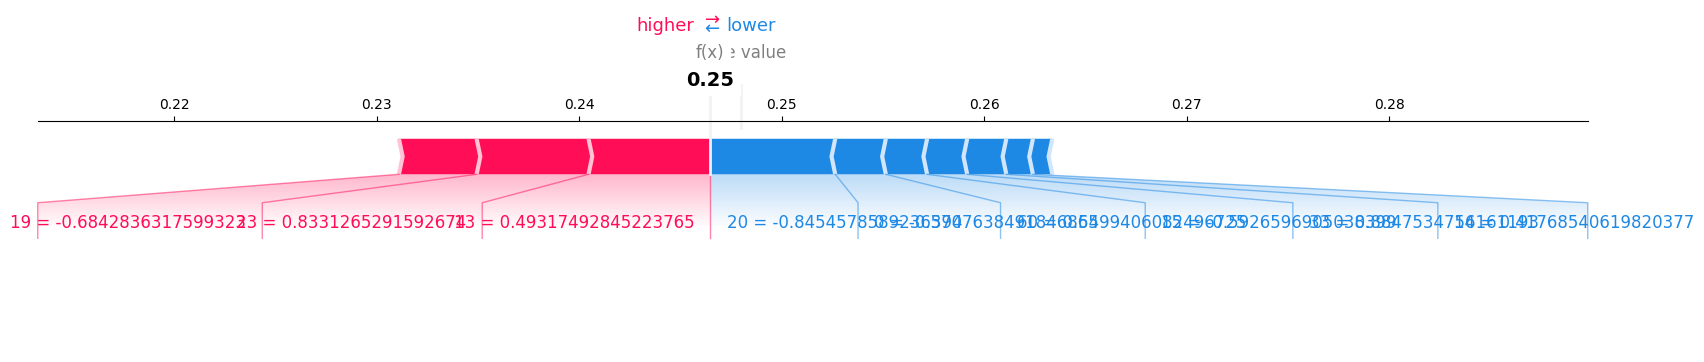

🔎 Force plot for class 2


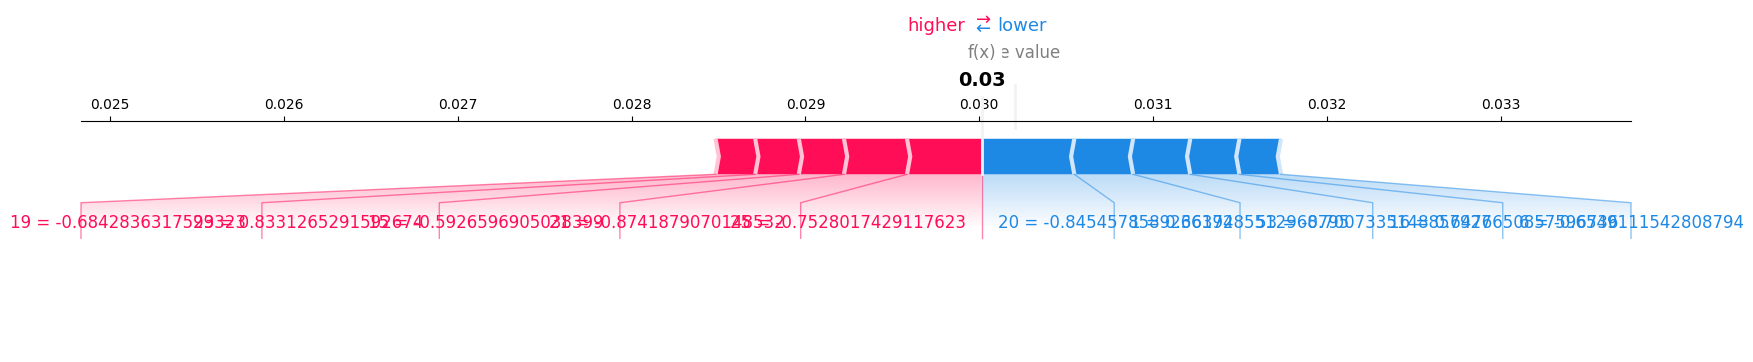

🔎 Force plot for class 3


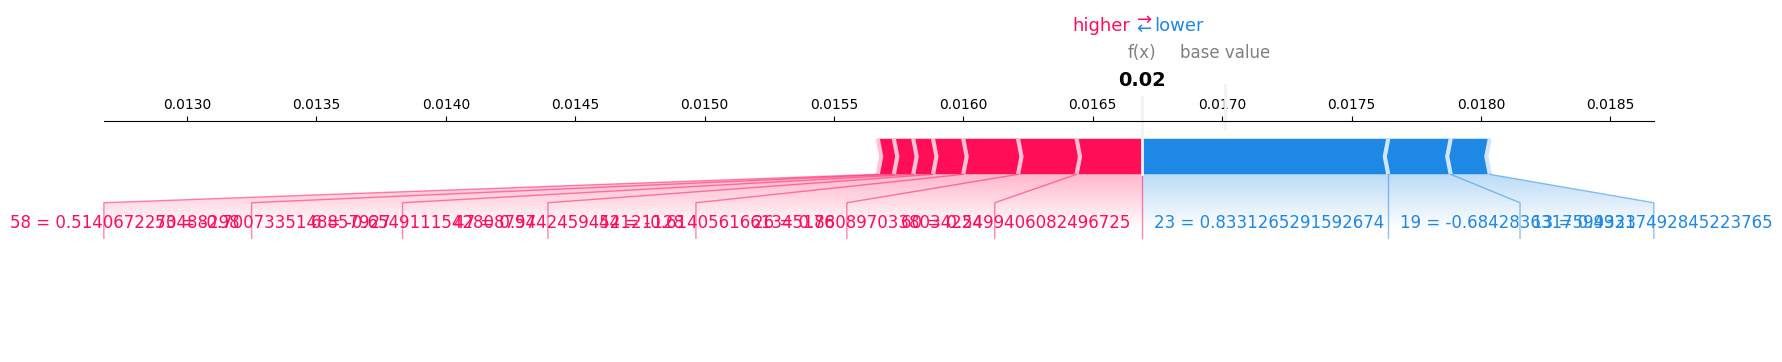

🔎 Force plot for class 4


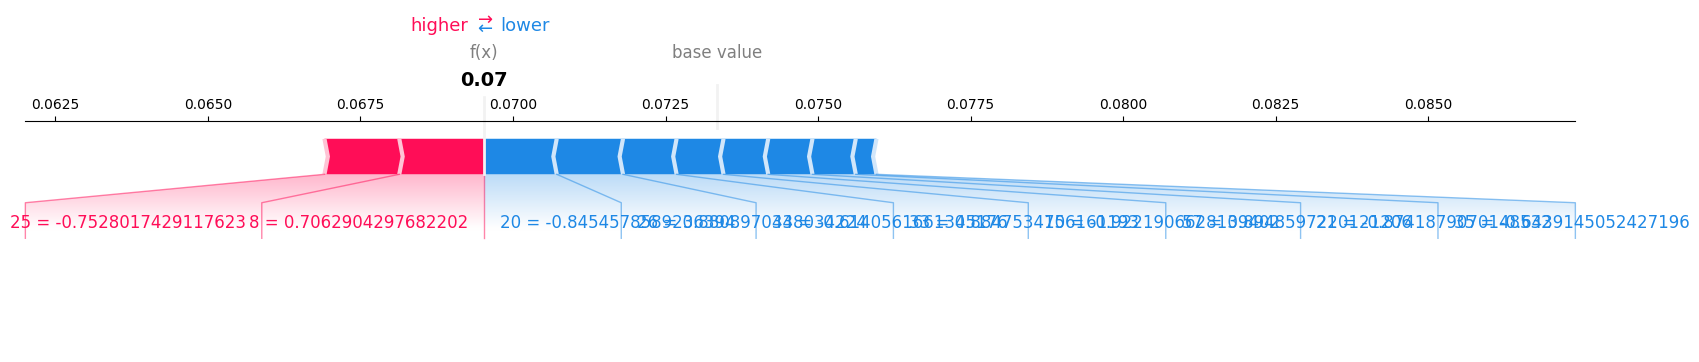

🔎 Force plot for class 5


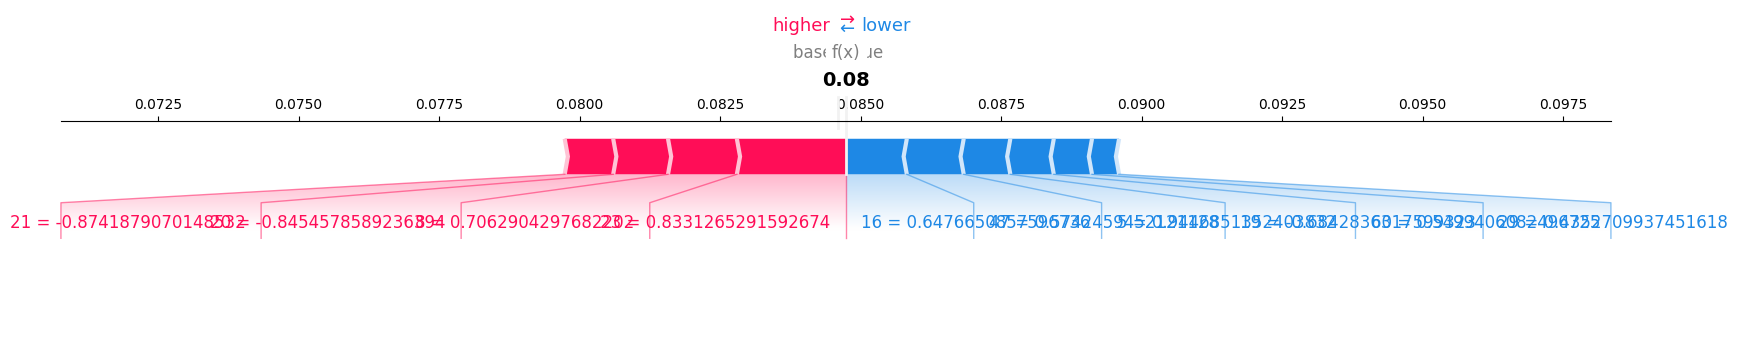

🔎 Force plot for class 6


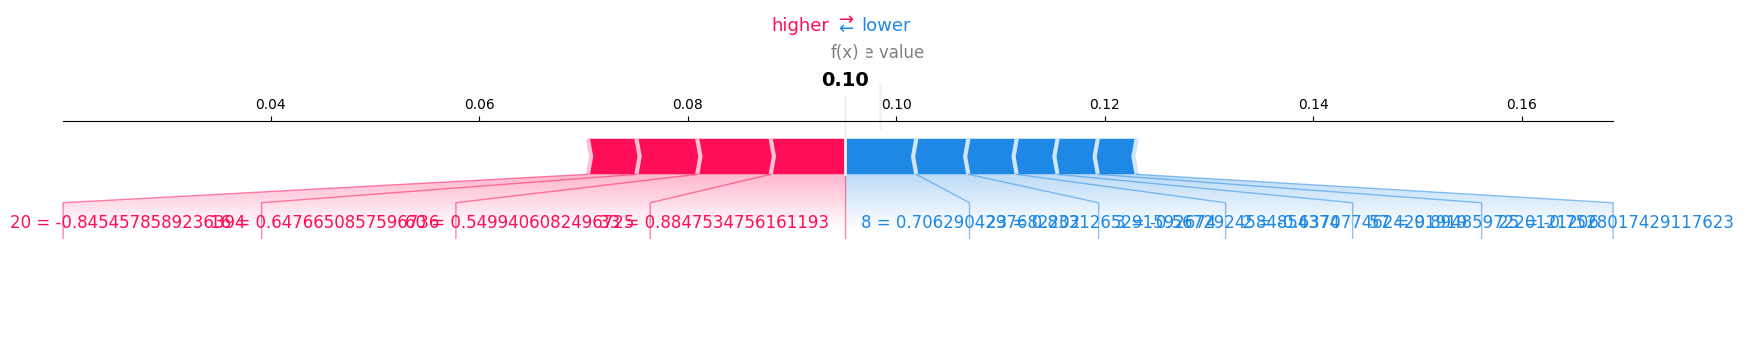

🔎 Force plot for class 7


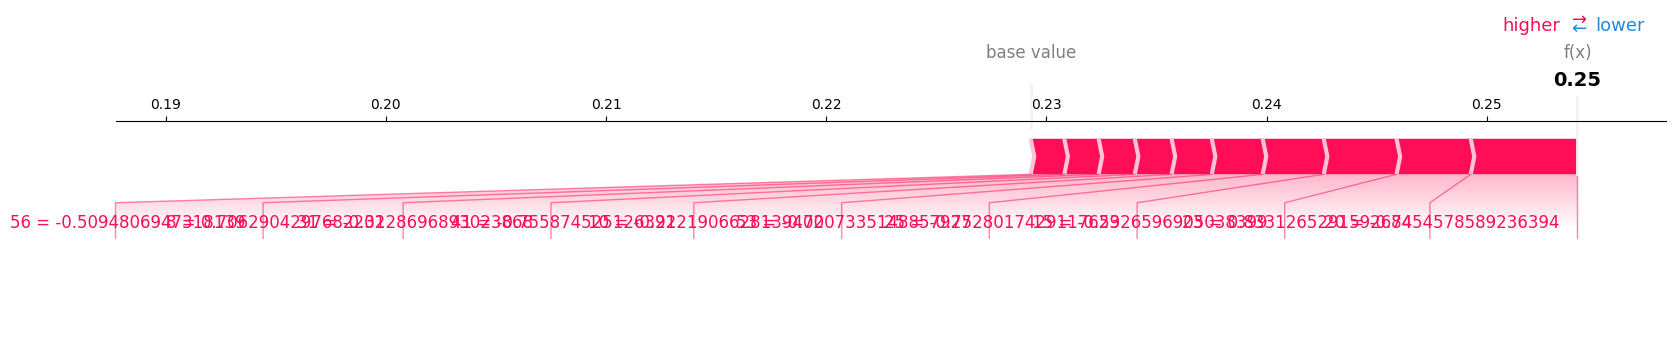

In [17]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === Load dataset ===
data = pd.read_csv("final_node2vec_embeddings.csv")
print("✔️ Loaded dataset. Columns:")
print(list(data.columns))

# === Features and labels ===
feature_names = [str(i) for i in range(64)]  # columns named '0' to '63'
X = data[feature_names].values
y = data["label"].values

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train model ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

# === Pick a sample to explain ===
sample = X_scaled[0:1]
input_df = pd.DataFrame(sample, columns=feature_names)

# === SHAP Explainer ===
print("🔍 Computing SHAP values. This may take a few seconds...")
explainer = shap.KernelExplainer(
    lambda x: model.predict_proba(x),
    shap.kmeans(X_train, 10)
)
shap_values = explainer.shap_values(sample)
predicted_class = model.predict(sample)[0]

print(f"✅ Predicted class: {predicted_class}")
print("✔️ SHAP values type:", type(shap_values))

# === SHAP plotting ===
shap.initjs()

# === Handle SHAP values in NumPy format: (1, 64, num_classes) ===
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"✔️ SHAP value shape: {shap_values.shape}")
    for class_idx in range(shap_values.shape[2]):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[0, :, class_idx],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
         
# === Alternative fallback for list-of-arrays format ===
elif isinstance(shap_values, list) and len(shap_values) > predicted_class:
    print("⚠️ Using fallback for list-of-arrays SHAP values.")
    for class_idx in range(len(shap_values)):
        print(f"🔎 Force plot for class {class_idx}")
        shap.force_plot(
            explainer.expected_value[class_idx],
            shap_values[class_idx][0],
            input_df.iloc[0],
            feature_names=feature_names,
            matplotlib=True
        )
        
else:
    print("❌ SHAP format not supported for plotting.")
